# Cargamos datasets

In [161]:
import pandas as pd

# Cargar los datasets
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Información dataset movies

In [2]:

# Mostrar información general de los datasets
print("-- Dataset movies ---")
print("\n-- info ---")
print(movies_df.info())
print("\n-- head ---")
print(movies_df.head())
print("\n-- describe ---")
print(movies_df.describe(include="all"))

-- Dataset movies ---

-- info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             4900 non-null   object
 1   user             4900 non-null   object
 2   rating           4900 non-null   int64 
 3   theme            4900 non-null   object
 4   production_year  4900 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 191.5+ KB
None

-- head ---
           name     user  rating   theme  production_year
0  12 Angry Men  user169       6  Sci-Fi             2021
1  12 Angry Men  user425       9  Sci-Fi             2015
2  12 Angry Men  user321       8  Sci-Fi             2021
3  12 Angry Men  user329       4  Sci-Fi             2015
4  12 Angry Men  user303       1  Sci-Fi             2021

-- describe ---
              name     user       rating  theme  production_year
count         4900     4900  4900.000000   4

# Información dataset user_test

In [3]:
print("\n-- Dataset test users ---")
print("\n-- info ---")
print(users_test_df.info())
print("\n-- head ---")
print(users_test_df.head(100))
print("\n-- describe ---")
print(users_test_df.describe(include="all"))


-- Dataset test users ---

-- info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  143 non-null    int64 
 1   user        143 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None

-- head ---
    Unnamed: 0     user
0            0  user169
1            1  user425
2            2  user321
3            3  user329
4            4  user303
..         ...      ...
95        4704  user115
96        4705  user119
97        4706  user138
98        4707  user170
99        4708  user161

[100 rows x 2 columns]

-- describe ---
         Unnamed: 0     user
count    143.000000      143
unique          NaN      143
top             NaN  user169
freq            NaN        1
mean    1701.342657      NaN
std     2261.690886      NaN
min        0.000000      NaN
25%       37.500000      NaN
50%       76.000000      NaN
75%     4

# Revisión nulos y duplicados.

## Movies

In [4]:
# Revisar valores nulos por columna
print("Valores nulos por columna:")
print(movies_df.isna().sum())

Valores nulos por columna:
name               0
user               0
rating             0
theme              0
production_year    0
dtype: int64


In [5]:
# Revisar filas potencialmente duplicadas
print("\nNúmero de filas duplicadas en movies_df:", movies_df.duplicated().sum())


Número de filas duplicadas en movies_df: 0


## Users_test

In [6]:
# Revisar valores nulos por columna
print("Valores nulos por columna:")
print(users_test_df.isna().sum())

Valores nulos por columna:
Unnamed: 0    0
user          0
dtype: int64


In [7]:
# Revisar filas potencialmente duplicadas
print("\nNúmero de filas duplicadas en movies_df:", users_test_df.duplicated().sum())


Número de filas duplicadas en movies_df: 0


In [8]:
users_test_df = users_test_df.drop("Unnamed: 0", axis=1)


In [9]:
print(users_test_df)

        user
0    user169
1    user425
2    user321
3    user329
4    user303
..       ...
138  user160
139   user55
140    user6
141   user85
142  user177

[143 rows x 1 columns]


In [10]:
# Opcional: mostrar duplicados (si existieran) para examinarlos
# if movies_df.duplicated().sum() > 0:
#     duplicates = movies_df[movies_df.duplicated(keep=False)]
#     print("\nEjemplos de filas duplicadas:")
#     print(duplicates.head(10))

# EDA

In [11]:
import matplotlib.pyplot as plt

# 1. Cantidad de usuarios y películas únicas
num_unique_users = movies_df['user'].nunique()
num_unique_movies = movies_df['name'].nunique()

print(f"Número de usuarios únicos: {num_unique_users}")
print(f"Número de películas únicas: {num_unique_movies}")

Número de usuarios únicos: 196
Número de películas únicas: 94


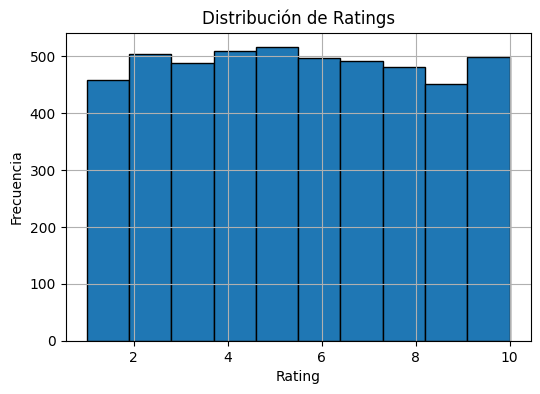

In [12]:
# 2. Distribución de las valoraciones
plt.figure(figsize=(6,4))
movies_df['rating'].hist(bins=10, edgecolor='black')
plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

In [13]:
# 3. Cantidad de reseñas por usuario
reviews_per_user = movies_df['user'].value_counts()
print("\nEstadísticas de reseñas por usuario:")
print(reviews_per_user.describe())



Estadísticas de reseñas por usuario:
count    196.000000
mean      25.000000
std       37.693773
min        1.000000
25%        1.000000
50%        3.500000
75%       88.000000
max      101.000000
Name: count, dtype: float64


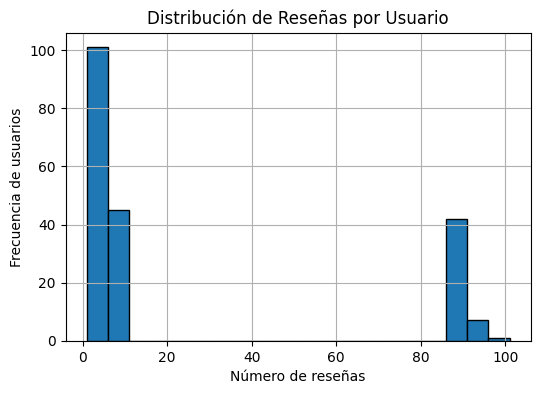

In [14]:
# Opcional: ver la distribución de forma gráfica
plt.figure(figsize=(6,4))
reviews_per_user.hist(bins=20, edgecolor='black')
plt.title("Distribución de Reseñas por Usuario")
plt.xlabel("Número de reseñas")
plt.ylabel("Frecuencia de usuarios")
plt.show()

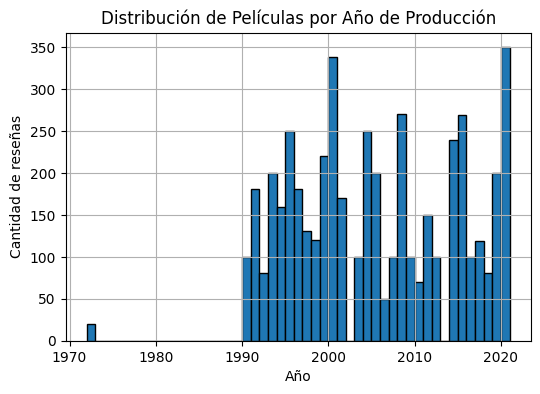

In [15]:
# 4. Distribución de las películas por año
plt.figure(figsize=(6,4))
movies_df['production_year'].hist(bins=range(movies_df['production_year'].min(), 
                                             movies_df['production_year'].max()+1),
                                  edgecolor='black')
plt.title("Distribución de Películas por Año de Producción")
plt.xlabel("Año")
plt.ylabel("Cantidad de reseñas")
plt.show()

In [16]:
# Vamos a ver si todos los usuarios en users_test_df están en movies_df
unique_users_training = set(movies_df['user'].unique())
users_test = set(users_test_df['user'].unique())

# Usuarios del test que sí están en el training
users_in_training = users_test.intersection(unique_users_training)
# Usuarios del test que no están en el training
users_not_in_training = users_test.difference(unique_users_training)

print(f"Usuarios en test: {len(users_test)}")
print(f"Usuarios del test que también están en training: {len(users_in_training)}")
print(f"Usuarios del test que no están en training: {len(users_not_in_training)}")
print("\nEjemplo de usuarios que NO están en training:", list(users_not_in_training)[:10])


Usuarios en test: 143
Usuarios del test que también están en training: 143
Usuarios del test que no están en training: 0

Ejemplo de usuarios que NO están en training: []


## Observaciones

1. **Distribución de ratings**:  
   Observamos un reparto bastante uniforme de 1 a 10. No parece haber sesgos fuertes (por ejemplo, todo el mundo valorando muy alto), lo cual es bueno para el modelo.  

2. **Reseñas por usuario**:  
   - Tenemos 196 usuarios, con una media de 25 reseñas cada uno, pero la mediana es de apenas 3.5 reseñas.  
   - Esto revela que hay usuarios muy activos (el 25% superior llega a 88 reseñas o más) y muchos usuarios con muy pocas reseñas (la mitad de los usuarios tiene 3-4 reseñas o menos).  
   - Esta disparidad puede complicar un poco el filtrado colaborativo **basado en usuarios** puro, ya que para muchos usuarios hay muy poca información.  

3. **Películas por año**:  
   - El rango va aproximadamente desde 1972 hasta 2021, con una mayor concentración a partir de los 90 y 2000. No se aprecian problemas de datos faltantes.  

4. **Usuarios de test presentes en el set de entrenamiento**:  
   - ¡Los 143 usuarios de test aparecen también en el set de entrenamiento! No tenemos problema de *cold start* de usuario; todos tienen al menos alguna reseña en el set de entrenamiento.


## Reflexión

Con lo anterior, tenemos un escenario favorable:  
- No tenemos usuarios completamente nuevos.  
- No tenemos valores nulos.  
- Hay cierta variabilidad en el número de reseñas por usuario.  

Dado que todos los usuarios de test sí tienen historial, podríamos aplicar un **sistema de recomendación colaborativo** (ya sea **User-Based** o **Item-Based**). No obstante, conviene señalar:

- **User-Based CF** puede sufrir cuando un usuario tiene muy pocas reseñas (lo que dificulta encontrar vecinos “similares”).  
- **Item-Based CF** tiende a ser más estable cuando las películas tienen suficiente cantidad de reseñas de distintos usuarios. Como tenemos 94 películas y cada una ha sido valorada múltiples veces, es probable que **Item-Based** funcione razonablemente bien.  

Otra opción es usar un **enfoque híbrido** que combine filtrado colaborativo y basado en contenido (usando `theme` y `production_year`). Sin embargo, quizá lo más directo sea empezar con un enfoque colaborativo sencillo y luego ver si necesitamos “refinar” con información de contenido para mejorar resultados.

# Matriz usuario-item

- La matriz usuario–item que contenga las valoraciones, pues es un paso habitual en recomendación colaborativa
- Luego podremos decidir si hacemos un Item-Based CF o un modelo de factorización matricial (SVD)

In [17]:
import numpy as np

# Construimos la matriz usuario-item.
# Filas = usuarios, 
# columnas = películas.
# El valor en [fila, columna] es el rating del usuario a la película.

# 1) Obtener listas únicas y ordenadas de usuarios y películas
unique_users = sorted(movies_df['user'].unique())
unique_movies = sorted(movies_df['name'].unique())

# 2) Creamos diccionarios para mapear user -> índice y movie -> índice
user_to_idx = {user: idx for idx, user in enumerate(unique_users)}
movie_to_idx = {movie: idx for idx, movie in enumerate(unique_movies)}

# 3) Inicializamos la matriz con ceros o con np.nan
user_item_matrix = np.zeros((len(unique_users), len(unique_movies)))

# 4) Rellenamos la matriz con los ratings
for row in movies_df.itertuples(index=False):
    u = row.user
    m = row.name
    r = row.rating
    user_index = user_to_idx[u]
    movie_index = movie_to_idx[m]
    user_item_matrix[user_index, movie_index] = r

print(f"Dimensiones de la matriz usuario-item: {user_item_matrix.shape}")
print("· Fila = Usuarios")
print("· Columna = Películas")
print("\nEjemplo de la matriz (primeras 10 filas y 10 columnas):")
print(user_item_matrix[:10,:10])


Dimensiones de la matriz usuario-item: (196, 94)
· Fila = Usuarios
· Columna = Películas

Ejemplo de la matriz (primeras 10 filas y 10 columnas):
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  6.  6.  4.  9.  1.  4. 10.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


¿Qué haremos con los ceros?

- A veces se dejan como 0 y se interpreta que el usuario no valoró esa película.
- Otras veces se prefiere usar NaN (valores faltantes) y aplicar un algoritmo que maneje bien los missing values.
- También se puede sustituir por la media del usuario o de la película para normalizar un poco.

# Usaremos un Item-Based Collaborative Filtering simple
- Que suele funcionar bien cuando hay más usuarios que ítems y cada película tiene suficientes valoraciones.

## Idea general de Item-Based CF


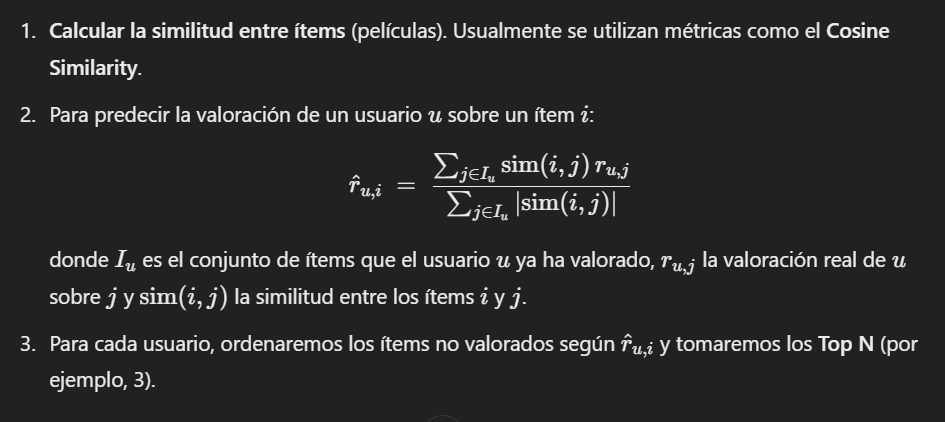
   

## Código

In [18]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1) Calculamos la similitud entre películas (ítems)
#    Tomamos la matriz de items transpuesta, es decir user_item_matrix.T 
#    Dimensión: (n_items, n_users)
item_similarity = cosine_similarity(user_item_matrix.T)  
# item_similarity[i, j] = similitud entre la película i y j

# 2) Definimos una función para predecir el rating de un usuario u para un ítem i
def predict_rating_item_based(user_index, item_index, user_item_matrix, item_similarity):
    """
    Calcula la predicción de la valoración del usuario user_index para la película item_index
    usando un promedio ponderado por la similitud (Item-Based CF).
    """
    # Ratings del usuario para todos los ítems
    user_ratings = user_item_matrix[user_index, :]
    
    # Similitudes de la película i con todas las demás
    similarities = item_similarity[item_index, :]
    
    # Máscara de ítems que el usuario ha valorado (ratings > 0)
    mask_rated = user_ratings > 0
    
    # Filtramos solo similitudes de ítems que el usuario valoró
    relevant_similarities = similarities[mask_rated]
    
    # Valoraciones del usuario en los ítems que valoró
    relevant_ratings = user_ratings[mask_rated]
    
    if len(relevant_ratings) == 0:
        # Si el usuario no valoró nada, devolvemos un valor neutral (ej. la media global o 0)
        return 0.0
    
    # Calculamos predicción: promedio ponderado por la similitud
    # evitamos división por cero sumando una mínima constante a denominador
    predicted_rating = np.sum(relevant_similarities * relevant_ratings) / (np.sum(np.abs(relevant_similarities)) + 1e-9)
    return predicted_rating


def recommend_items_item_based(user_id, user_item_matrix, item_similarity, user_to_idx, movie_to_idx, idx_to_movie, top_n=3):
    """
    Retorna las top_n películas recomendadas para el usuario user_id
    siguiendo un esquema de Item-Based CF.
    """
    # Obtenemos el índice del usuario
    u_idx = user_to_idx[user_id]
    # Obtenemos las valoraciones de ese usuario
    user_ratings = user_item_matrix[u_idx, :]
    
    # Películas que el usuario NO ha valorado (rating = 0)
    items_not_rated = np.where(user_ratings == 0)[0]
    
    # Calculamos predicciones para cada ítem no valorado
    predicted_scores = []
    for item_idx in items_not_rated:
        score = predict_rating_item_based(u_idx, item_idx, user_item_matrix, item_similarity)
        predicted_scores.append((item_idx, score))
    
    # Ordenamos ítems por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionamos los top_n
    top_items = predicted_scores[:top_n]
    
    # Convertimos índices de ítems de vuelta a nombres de película
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    return recommended_movie_names


# 3) Crear el índice inverso para mapear índice -> nombre de película
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# 4) Ejemplo: hacer una recomendación para un usuario
some_user = ['user169', 'user425', 'user321']
for user in some_user:
    recommended = recommend_items_item_based(
        user, 
        user_item_matrix, 
        item_similarity, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3
    )

    print(f"Recomendaciones para {user}: {recommended}")


Recomendaciones para user169: []
Recomendaciones para user425: ['Fight Club', 'Spirited Away', 'The Prestige']
Recomendaciones para user321: ['Inception', 'Forrest Gump', 'The Thing']


Resultado de la verificación:

- Recomendaciones para user169: []
- Recomendaciones para user425: ['Fight Club', 'Spirited Away', 'The Prestige']
- Recomendaciones para user321: ['Inception', 'Forrest Gump', 'The Thing']

Tenemos que buscar la razón la cual user169 no ha obtenido ninguna recomendación, **¿quizás porque ya ha calificado todas las películas (94)?**

In [19]:
u_idx = user_to_idx['user169']
user_ratings = user_item_matrix[u_idx, :]
rated_items_count = np.count_nonzero(user_ratings)
print(f"El usuario169 ha valorado {rated_items_count} ítems.")


El usuario169 ha valorado 94 ítems.


Efectivamente, si el usuario ha valorado todas las películas (94 ítems en este caso), el sistema de Item-Based CF tal como lo hemos definido no tendrá nada nuevo que recomendarle, pues no hay “espacio” para predecir ratings sobre ítems desconocidos.

¿Qué hacer en estos casos?

En sistemas de recomendación reales, se suele implementar un fallback o estrategia de respaldo, por ejemplo:

- Recomendar las películas más populares (globalmente mejor valoradas) o que más encajen con su historial si quedan algunas con rating 0.
- Recomendar aleatoriamente (no es lo ideal, pero se usa a veces para sorpresa o exploración).
- Basarse en características de contenido; por ejemplo, si le gustaron mucho las de género “Sci-Fi”, quizá sugerirle las top 3 no vistas de “Sci-Fi”.
- Recomendar estrenos o películas más recientes (si es que no las tiene valoradas).

## Código teniendo en cuenta la posibilidad de necesitar un fallback ante casos particulares

### Cosine_similarity


In [20]:
#### cosine_similarity #### 101/900 puntos

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1) Calculamos la similitud entre películas (ítems)
#    Tomamos la matriz de items transpuesta, es decir user_item_matrix.T 
#    Dimensión: (n_items, n_users)
item_similarity = cosine_similarity(user_item_matrix.T)  
# item_similarity[i, j] = similitud entre la película i y j

# 2) Definimos una función para predecir el rating de un usuario u para un ítem i
def predict_rating_item_based(user_index, item_index, user_item_matrix, item_similarity):
    """
    Calcula la predicción de la valoración del usuario user_index para la película item_index
    usando un promedio ponderado por la similitud (Item-Based CF).
    """
    # Ratings del usuario para todos los ítems
    user_ratings = user_item_matrix[user_index, :]
    
    # Similitudes de la película i con todas las demás
    similarities = item_similarity[item_index, :]
    
    # Máscara de ítems que el usuario ha valorado (ratings > 0)
    mask_rated = user_ratings > 0
    
    # Filtramos solo similitudes de ítems que el usuario valoró
    relevant_similarities = similarities[mask_rated]
    
    # Valoraciones del usuario en los ítems que valoró
    relevant_ratings = user_ratings[mask_rated]
    
    if len(relevant_ratings) == 0:
        # Si el usuario no valoró nada, devolvemos un valor neutral (ej. la media global o 0)
        return 0.0
    
    # Calculamos predicción: promedio ponderado por la similitud
    # evitamos división por cero sumando una mínima constante a denominador
    predicted_rating = np.sum(relevant_similarities * relevant_ratings) / (np.sum(np.abs(relevant_similarities)) + 1e-9)
    return predicted_rating


def recommend_items_item_based(user_id, user_item_matrix, item_similarity, 
                               user_to_idx, movie_to_idx, idx_to_movie, 
                               top_n=3, fallback_df=None):
    """
    Retorna las top_n películas recomendadas para el usuario user_id
    siguiendo un esquema de Item-Based CF.
    fallback_df: DataFrame de fallback (por ejemplo: películas y su rating promedio).
    """
    # Obtenemos el índice del usuario
    u_idx = user_to_idx[user_id]
    # Obtenemos las valoraciones de ese usuario
    user_ratings = user_item_matrix[u_idx, :]
    
    # Películas que el usuario NO ha valorado (rating = 0)
    items_not_rated = np.where(user_ratings == 0)[0]
    
    # Si el usuario lo ha valorado todo, aplicamos fallback
    if len(items_not_rated) == 0:
        if fallback_df is not None:
            # Ordenamos por rating medio descendente y tomamos las top_n
            fallback_top = fallback_df.nlargest(top_n, 'rating_mean')['name'].tolist()
            return fallback_top
        else:
            # Si no hay fallback, retornamos lista vacía
            return []
    
    # Calculamos predicciones para cada ítem no valorado
    predicted_scores = []
    for item_idx in items_not_rated:
        score = predict_rating_item_based(u_idx, item_idx, user_item_matrix, item_similarity)
        predicted_scores.append((item_idx, score))
    
    # Ordenamos ítems por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionamos los top_n
    top_items = predicted_scores[:top_n]
    
    # Convertimos índices de ítems de vuelta a nombres de película
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    return recommended_movie_names


# 3) Crear el índice inverso para mapear índice -> nombre de película
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# DataFrame con promedio de rating por película
fallback_df = (movies_df.groupby('name', as_index=False)
               .agg(rating_mean=('rating', 'mean'))
               .sort_values(by='rating_mean', ascending=False))

# 4) Ejemplo: hacer una recomendación para un usuario
some_user = ['user169', 'user425', 'user321']
for user in some_user:
    recommended = recommend_items_item_based(
        user, 
        user_item_matrix, 
        item_similarity, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3,
        fallback_df=fallback_df
    )
    print(f"Recomendaciones para {user}: {recommended}")


Recomendaciones para user169: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user425: ['Fight Club', 'Spirited Away', 'The Prestige']
Recomendaciones para user321: ['Inception', 'Forrest Gump', 'The Thing']


### Pearson Correlation

In [21]:
#### Pearson Correlation - 153/900 ####

# 1) Recalcular la matriz de similitud usando Pearson Correlation
def calculate_pearson_similarity(user_item_matrix):
    """
    Calcula la similitud entre ítems utilizando Pearson Correlation.
    Retorna una matriz de similitud de dimensiones (n_items, n_items).
    """
    n_items = user_item_matrix.shape[1]
    similarity_matrix = np.zeros((n_items, n_items))

    for i in range(n_items):
        for j in range(i, n_items):
            if i == j:
                similarity_matrix[i, j] = 1  # Similaridad de un ítem consigo mismo es 1
                continue
            
            # Obtener ratings de usuarios para ambos ítems
            ratings_i = user_item_matrix[:, i]
            ratings_j = user_item_matrix[:, j]
            
            # Filtrar usuarios que han valorado ambas películas
            mask = (ratings_i > 0) & (ratings_j > 0)  # Consideramos solo valores existentes
            
            if np.sum(mask) > 1:  # Solo calculamos si hay suficientes datos (>1 usuario)
                similarity_matrix[i, j] = np.corrcoef(ratings_i[mask], ratings_j[mask])[0, 1]
                similarity_matrix[j, i] = similarity_matrix[i, j]  # Simetría
            else:
                similarity_matrix[i, j] = 0
                similarity_matrix[j, i] = 0

    return similarity_matrix

# Aplicar Pearson en la matriz usuario-item
item_similarity_pearson = calculate_pearson_similarity(user_item_matrix)

# 2) Definimos una función para predecir el rating de un usuario u para un ítem i
def predict_rating_item_based(user_index, item_index, user_item_matrix, item_similarity):
    """
    Calcula la predicción de la valoración del usuario user_index para la película item_index
    usando un promedio ponderado por la similitud (Item-Based CF).
    """
    # Ratings del usuario para todos los ítems
    user_ratings = user_item_matrix[user_index, :]
    
    # Similitudes de la película i con todas las demás
    similarities = item_similarity[item_index, :]
    
    # Máscara de ítems que el usuario ha valorado (ratings > 0)
    mask_rated = user_ratings > 0
    
    # Filtramos solo similitudes de ítems que el usuario valoró
    relevant_similarities = similarities[mask_rated]
    
    # Valoraciones del usuario en los ítems que valoró
    relevant_ratings = user_ratings[mask_rated]
    
    if len(relevant_ratings) == 0:
        # Si el usuario no valoró nada, devolvemos un valor neutral (ej. la media global o 0)
        return 0.0
    
    # Calculamos predicción: promedio ponderado por la similitud
    # evitamos división por cero sumando una mínima constante a denominador
    predicted_rating = np.sum(relevant_similarities * relevant_ratings) / (np.sum(np.abs(relevant_similarities)) + 1e-9)
    return predicted_rating


def recommend_items_item_based(user_id, user_item_matrix, item_similarity, 
                               user_to_idx, movie_to_idx, idx_to_movie, 
                               top_n=3, fallback_df=None):
    """
    Retorna las top_n películas recomendadas para el usuario user_id
    siguiendo un esquema de Item-Based CF.
    fallback_df: DataFrame de fallback (por ejemplo: películas y su rating promedio).
    """
    # Obtenemos el índice del usuario
    u_idx = user_to_idx[user_id]
    # Obtenemos las valoraciones de ese usuario
    user_ratings = user_item_matrix[u_idx, :]
    
    # Películas que el usuario NO ha valorado (rating = 0)
    items_not_rated = np.where(user_ratings == 0)[0]
    
    # Si el usuario lo ha valorado todo, aplicamos fallback
    if len(items_not_rated) == 0:
        if fallback_df is not None:
            # Ordenamos por rating medio descendente y tomamos las top_n
            fallback_top = fallback_df.nlargest(top_n, 'rating_mean')['name'].tolist()
            return fallback_top
        else:
            # Si no hay fallback, retornamos lista vacía
            return []
    
    # Calculamos predicciones para cada ítem no valorado
    predicted_scores = []
    for item_idx in items_not_rated:
        score = predict_rating_item_based(u_idx, item_idx, user_item_matrix, item_similarity_pearson)
        predicted_scores.append((item_idx, score))
    
    # Ordenamos ítems por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionamos los top_n
    top_items = predicted_scores[:top_n]
    
    # Convertimos índices de ítems de vuelta a nombres de película
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    return recommended_movie_names


# 3) Crear el índice inverso para mapear índice -> nombre de película
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# DataFrame con promedio de rating por película
fallback_df = (movies_df.groupby('name', as_index=False)
               .agg(rating_mean=('rating', 'mean'))
               .sort_values(by='rating_mean', ascending=False))

# 4) Ejemplo: hacer una recomendación para un usuario
some_user = ['user169', 'user425', 'user321']
for user in some_user:
    recommended = recommend_items_item_based(
        user, 
        user_item_matrix, 
        item_similarity_pearson, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3,
        fallback_df=fallback_df
    )
    print(f"Recomendaciones para {user}: {recommended}")


Recomendaciones para user169: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user425: ['Forrest Gump', 'Spirited Away', 'Terminator 2: Judgment Day']
Recomendaciones para user321: ['The Prestige', 'Forrest Gump', 'Terminator 2: Judgment Day']


### Optimizaciones 

In [22]:
import numpy as np
import pandas as pd

# 1) Recalcular la matriz de similitud usando Pearson Correlation
def calculate_pearson_similarity(user_item_matrix):
    """
    Calcula la similitud entre ítems utilizando Pearson Correlation.
    Retorna una matriz de similitud de dimensiones (n_items, n_items).
    """
    n_items = user_item_matrix.shape[1]
    similarity_matrix = np.zeros((n_items, n_items))

    for i in range(n_items):
        for j in range(i, n_items):
            if i == j:
                similarity_matrix[i, j] = 1  # Similaridad de un ítem consigo mismo es 1
                continue
            
            # Obtener ratings de usuarios para ambos ítems
            ratings_i = user_item_matrix[:, i]
            ratings_j = user_item_matrix[:, j]
            
            # Filtrar usuarios que han valorado ambas películas
            mask = (ratings_i > 0) & (ratings_j > 0)  # Consideramos solo valores existentes
            
            if np.sum(mask) > 1:  # Solo calculamos si hay suficientes datos (>1 usuario)
                similarity_matrix[i, j] = np.corrcoef(ratings_i[mask], ratings_j[mask])[0, 1]
                similarity_matrix[j, i] = similarity_matrix[i, j]  # Simetría
            else:
                similarity_matrix[i, j] = 0
                similarity_matrix[j, i] = 0

    return similarity_matrix

# Aplicar Pearson en la matriz usuario-item
item_similarity_pearson = calculate_pearson_similarity(user_item_matrix)

# 2) Definimos una función para predecir el rating de un usuario u para un ítem i
def predict_rating_item_based(user_index, item_index, user_item_matrix, item_similarity):
    """
    Calcula la predicción de la valoración del usuario user_index para la película item_index
    usando un promedio ponderado por la similitud (Item-Based CF).
    """
    # Ratings del usuario para todos los ítems
    user_ratings = user_item_matrix[user_index, :]
    
    # Similitudes de la película i con todas las demás
    similarities = item_similarity[item_index, :]
    
    # Máscara de ítems que el usuario ha valorado (ratings > 0)
    mask_rated = user_ratings > 0
    
    # Filtramos solo similitudes de ítems que el usuario valoró
    relevant_similarities = similarities[mask_rated]
    
    # Valoraciones del usuario en los ítems que valoró
    relevant_ratings = user_ratings[mask_rated]
    
    if len(relevant_ratings) == 0:
        # Si el usuario no valoró nada, devolvemos un valor neutral (ej. la media global o 0)
        return 0.0
    
    # Calculamos predicción: promedio ponderado por la similitud
    # evitamos división por cero sumando una mínima constante a denominador
    predicted_rating = np.sum(relevant_similarities * relevant_ratings) / (np.sum(np.abs(relevant_similarities)) + 1e-9)
    return predicted_rating


def recommend_items_item_based(user_id, user_item_matrix, item_similarity, 
                               user_to_idx, movie_to_idx, idx_to_movie, 
                               top_n=3, fallback_df=None):
    """
    Retorna las top_n películas recomendadas para el usuario user_id
    siguiendo un esquema de Item-Based CF.
    fallback_df: DataFrame de fallback (por ejemplo: películas y su rating promedio).
    """
    # Obtenemos el índice del usuario
    u_idx = user_to_idx[user_id]
    # Obtenemos las valoraciones de ese usuario
    user_ratings = user_item_matrix[u_idx, :]
    
    # Películas que el usuario NO ha valorado (rating = 0)
    items_not_rated = np.where(user_ratings == 0)[0]
    
    # Si el usuario lo ha valorado todo, aplicamos fallback
    if len(items_not_rated) == 0:
        if fallback_df is not None:
            # Ordenamos por rating medio descendente y tomamos las top_n
            fallback_top = fallback_df.nlargest(top_n, 'rating_mean')['name'].tolist()
            return fallback_top
        else:
            # Si no hay fallback, retornamos lista vacía
            return []
    
    # Calculamos predicciones para cada ítem no valorado
    predicted_scores = []
    for item_idx in items_not_rated:
        score = predict_rating_item_based(u_idx, item_idx, user_item_matrix, item_similarity_pearson)
        predicted_scores.append((item_idx, score))
    
    # Ordenamos ítems por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionamos los top_n
    top_items = predicted_scores[:top_n]
    
    # Convertimos índices de ítems de vuelta a nombres de película
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    return recommended_movie_names


# 3) Crear el índice inverso para mapear índice -> nombre de película
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# DataFrame con promedio de rating por película
fallback_df = (movies_df.groupby('name', as_index=False)
               .agg(rating_mean=('rating', 'mean'))
               .sort_values(by='rating_mean', ascending=False))

# 4) Generar recomendaciones para usuarios de prueba
some_users = ['user169', 'user425', 'user321']
print("\nEjemplos de recomendación mejorados: ")
for user in some_users:
    recommended = recommend_items_item_based(
        user, 
        user_item_matrix, 
        item_similarity_pearson, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3,
        fallback_df=fallback_df
    )
    print(f"Recomendaciones para {user}: {recommended}")




Ejemplos de recomendación mejorados: 
Recomendaciones para user169: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user425: ['Forrest Gump', 'Spirited Away', 'Terminator 2: Judgment Day']
Recomendaciones para user321: ['The Prestige', 'Forrest Gump', 'Terminator 2: Judgment Day']


## Generamos el JSON `predictions.json`

In [23]:
import json

def generate_predictions_json(
    users_test_df,
    user_item_matrix,
    item_similarity,
    user_to_idx,
    movie_to_idx,
    idx_to_movie,
    fallback_df=None,
    top_n=3,
    output_path="../predictions/predictions.json"
):
    # Diccionario para almacenar todas las predicciones
    predictions_dict = {"target": {}}
    
    # Iteramos por cada usuario en el test set
    for u in users_test_df['user']:
        recommended_movies = recommend_items_item_based(
            user_id=u,
            user_item_matrix=user_item_matrix,
            item_similarity=item_similarity,
            user_to_idx=user_to_idx,
            movie_to_idx=movie_to_idx,
            idx_to_movie=idx_to_movie,
            top_n=top_n,
            fallback_df=fallback_df
        )
        
        # Guardar la lista de películas en el diccionario
        predictions_dict["target"][u] = recommended_movies
    
    # Guardar en formato JSON
    with open(output_path, 'w') as f:
        json.dump(predictions_dict, f, indent=4)

# Llamamos a la función
generate_predictions_json(
    users_test_df=users_test_df,
    user_item_matrix=user_item_matrix,
    item_similarity=item_similarity_pearson,
    user_to_idx=user_to_idx,
    movie_to_idx=movie_to_idx,
    idx_to_movie=idx_to_movie,
    fallback_df=fallback_df,  # O None si no quieres fallback
    top_n=3,
    output_path="../predictions/predictions.json"
)

## Resultado modelo: 
- (Cosine_similarity) 101/900 puntos en la plataforma Nuwe
- (Pearson Correlattion) 153/900 puntos en la plataforma Nuwe


# SVD

### 📊 **Análisis de Resultados con SVD (Refinamiento de k)**

| **k (componentes SVD)** | **Puntuación / 900** |
|------------------------|----------------------|
| **1**                  | **472**              |
| **2**                  | **438**              |
| **3**                  | **438**              |
| **4**                  | **321**              |
| **5**                  | **325**              |
| **6**                  | **300**              |
| **10**                 | **237**              |
| **20**                 | **189**              |
| **40**                 | **118**              |

---

### 📌 **Análisis de los resultados**
🔹 **Se confirma que `k=1` sigue siendo el mejor resultado (472/900)**, seguido de `k=2` y `k=3` con **438/900**.  
🔹 A partir de `k=4`, la precisión cae drásticamente.  
🔹 `k=5` da un pequeño **repunte** en comparación con `k=4`, pero sigue por debajo de `k=3`.  
🔹 **A medida que `k` aumenta, la precisión sigue decayendo, sin encontrar un nuevo punto óptimo.**

---

### **🔍 Interpretación de los Resultados**
1️⃣ **`k=1` y `k=2` capturan patrones clave en los datos**  
   - Parecen extraer **las relaciones más dominantes entre usuarios y películas**, lo que explica su buen rendimiento.  
   - Es probable que estas dimensiones capturen **tendencias generales**, como la popularidad de ciertas películas.  

2️⃣ **Más componentes (`k>3`) agregan ruido en lugar de mejorar la señal**  
   - En sistemas con **pocas interacciones por usuario**, agregar más componentes puede causar **sobreajuste** y hacer que las predicciones sean menos fiables.  
   - La caída abrupta después de `k=4` indica que los componentes adicionales **no aportan información útil** o están amplificando **errores en los datos**.  

3️⃣ **Posible causa: Densidad baja en la matriz usuario-item**  
   - Si muchos usuarios han calificado **pocas películas**, SVD podría estar **rellenando con valores ruidosos** en lugar de captar patrones reales.  
   - En estos casos, una **reducción agresiva de dimensionalidad** (como `k=1` o `k=2`) ayuda a extraer solo las **tendencias generales más fuertes**.  





In [24]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds

# 1) Preprocesamiento: Llenar valores faltantes con la media del usuario
def preprocess_user_item_matrix(user_item_matrix):
    """
    Rellena valores NaN con la media del usuario en la matriz usuario-item.
    """
    user_means = np.nanmean(user_item_matrix, axis=1, keepdims=True)
    user_item_matrix_filled = np.where(np.isnan(user_item_matrix), user_means, user_item_matrix)
    return user_item_matrix_filled, user_means

# Aplicamos el preprocesamiento
user_item_matrix_filled, user_means = preprocess_user_item_matrix(user_item_matrix)

# 2) Aplicar SVD
def apply_svd(user_item_matrix, k=20):
    """
    Aplica SVD a la matriz usuario-item y devuelve la matriz reconstruida con k factores latentes.
    """
    # Descomposición SVD
    U, sigma, Vt = svds(user_item_matrix, k=k)
    sigma = np.diag(sigma)  # Convertimos el vector sigma en matriz diagonal
    
    # Reconstrucción de la matriz
    predicted_matrix = np.dot(np.dot(U, sigma), Vt)
    
    return predicted_matrix

# Aplicamos SVD con k=20 factores latentes
predicted_ratings_svd = apply_svd(user_item_matrix_filled, k=1)

# 3) Generar recomendaciones
def recommend_items_svd(user_id, predicted_ratings, user_item_matrix, user_to_idx, movie_to_idx, idx_to_movie, top_n=3, fallback_df=None):
    """
    Genera recomendaciones usando la matriz de predicciones obtenida con SVD.
    Evita recomendar películas ya vistas por el usuario.
    """
    u_idx = user_to_idx[user_id]
    user_ratings = user_item_matrix[u_idx, :]

    # Películas que el usuario NO ha visto
    items_not_rated = np.where(np.isnan(user_ratings))[0]

    # Si el usuario ha visto todas las películas, aplicamos fallback
    if len(items_not_rated) == 0:
        if fallback_df is not None:
            fallback_top = fallback_df.nlargest(top_n, 'rating_mean')['name'].tolist()
            return fallback_top
        else:
            return []

    # Filtramos las predicciones solo para películas NO vistas
    predicted_scores = [(item_idx, predicted_ratings[u_idx, item_idx]) for item_idx in items_not_rated]

    # Ordenamos por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)

    # Seleccionamos las top_n películas
    top_items = predicted_scores[:top_n]

    # Convertimos índices de ítems a nombres de películas
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    
    return recommended_movie_names

# 4) Crear el índice inverso para mapear índice -> nombre de película
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# DataFrame con promedio de rating por película
fallback_df = (movies_df.groupby('name', as_index=False)
               .agg(rating_mean=('rating', 'mean'))
               .sort_values(by='rating_mean', ascending=False))

# 5) Generar recomendaciones para usuarios de prueba
some_users = ['user169', 'user425', 'user321']
print("\nEjemplos de recomendación con SVD: ")
for user in some_users:
    recommended = recommend_items_svd(
        user, 
        predicted_ratings_svd, 
        user_item_matrix, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3,
        fallback_df=fallback_df
    )
    print(f"Recomendaciones para {user}: {recommended}")



Ejemplos de recomendación con SVD: 
Recomendaciones para user169: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user425: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user321: ['The Lion King', 'A Separation', 'Memento']


## JSON

In [25]:
import json

def generate_predictions_json_svd(
    users_test_df,
    predicted_ratings,
    user_item_matrix,
    user_to_idx,
    movie_to_idx,
    idx_to_movie,
    fallback_df=None,
    top_n=3,
    output_path="../predictions/predictions.json"
):
    """
    Genera un archivo JSON con las recomendaciones usando SVD.
    """
    # Diccionario para almacenar todas las predicciones
    predictions_dict = {"target": {}}
    
    # Iteramos por cada usuario en el test set
    for u in users_test_df['user']:
        recommended_movies = recommend_items_svd(
            user_id=u,
            predicted_ratings=predicted_ratings,
            user_item_matrix=user_item_matrix,
            user_to_idx=user_to_idx,
            movie_to_idx=movie_to_idx,
            idx_to_movie=idx_to_movie,
            top_n=top_n,
            fallback_df=fallback_df
        )
        
        # Guardar la lista de películas en el diccionario
        predictions_dict["target"][u] = recommended_movies
    
    # Guardar en formato JSON
    with open(output_path, 'w') as f:
        json.dump(predictions_dict, f, indent=4)

# Llamamos a la función con SVD
generate_predictions_json_svd(
    users_test_df=users_test_df,
    predicted_ratings=predicted_ratings_svd,  # Matriz de predicciones de SVD
    user_item_matrix=user_item_matrix,
    user_to_idx=user_to_idx,
    movie_to_idx=movie_to_idx,
    idx_to_movie=idx_to_movie,
    fallback_df=fallback_df,  # O None si no quieres fallback
    top_n=3,
    output_path="../predictions/predictions.json"
)


# Revisamos de nuevo los datos

In [26]:
movies_df = pd.read_csv("../data/movies_dataset.csv")
movies_df


,name,user,rating,theme,production_year
0,12 Angry Men,user169,6,Sci-Fi,2021
1,12 Angry Men,user425,9,Sci-Fi,2015
2,12 Angry Men,user321,8,Sci-Fi,2021
3,12 Angry Men,user329,4,Sci-Fi,2015
4,12 Angry Men,user303,1,Sci-Fi,2021
...,...,...,...,...,...
4895,Pulp Fiction,user121,3,Crime,1994
4896,Interstellar,user88,5,Sci-Fi,2014
4897,The Dark Knight,user177,2,Action,2008
4898,The Shawshank Redemption,user162,6,Drama,1994


In [27]:
# 🔹 Ver estructura de los datos
print(movies_df.head())

# 🔹 Eliminar usuarios con pocos ratings (ejemplo: menos de 5 ratings)
user_counts = movies_df['user'].value_counts()
movies_df = movies_df[movies_df['user'].isin(user_counts[user_counts >= 5].index)]

# 🔹 Eliminar películas con pocos ratings (ejemplo: menos de 10 ratings)
movie_counts = movies_df['name'].value_counts()
movies_df = movies_df[movies_df['name'].isin(movie_counts[movie_counts >= 10].index)]

# 🔹 Normalizar el año de producción
movies_df['normalized_year'] = (movies_df['production_year'] - movies_df['production_year'].min()) / (movies_df['production_year'].max() - movies_df['production_year'].min())

# 🔹 One-Hot Encoding de los géneros
movies_df = pd.get_dummies(movies_df, columns=['theme'], prefix='genre')

# 🔹 Guardar dataset preprocesado
movies_df.to_csv("../data/movies_dataset_clean.csv", index=False)

print("✅ Preprocesamiento completado. Datos guardados en 'movies_dataset_clean.csv'.")
print(movies_df.head())


           name     user  rating   theme  production_year
0  12 Angry Men  user169       6  Sci-Fi             2021
1  12 Angry Men  user425       9  Sci-Fi             2015
2  12 Angry Men  user321       8  Sci-Fi             2021
3  12 Angry Men  user329       4  Sci-Fi             2015
4  12 Angry Men  user303       1  Sci-Fi             2021
✅ Preprocesamiento completado. Datos guardados en 'movies_dataset_clean.csv'.
           name     user  rating  production_year  normalized_year  \
0  12 Angry Men  user169       6             2021         1.000000   
1  12 Angry Men  user425       9             2015         0.877551   
2  12 Angry Men  user321       8             2021         1.000000   
3  12 Angry Men  user329       4             2015         0.877551   
4  12 Angry Men  user303       1             2021         1.000000   

   genre_Action  genre_Adventure  genre_Comedy  genre_Crime  \
0         False            False         False        False   
1         False            

In [28]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
import pandas as pd

df = movies_df

# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))  # Asegurar que el rating está entre 1 y 10
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)

# 🔹 Probar distintos valores de k
for k in [1, 2, 3, 5]:
    print(f"🔹 Entrenando SVD con k={k}...")
    algo = SVD(n_factors=k, random_state=42)
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
    print(f'✅ k={k} → RMSE promedio: {results["test_rmse"].mean()}')

🔹 Entrenando SVD con k=1...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.8957  2.8880  2.9357  2.9560  2.8973  2.9146  0.0265  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
✅ k=1 → RMSE promedio: 2.914578862633125
🔹 Entrenando SVD con k=2...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.8882  2.9714  2.9014  2.9019  2.9970  2.9320  0.0437  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
✅ k=2 → RMSE promedio: 2.9319821642875694
🔹 Entrenando SVD con k=3...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (tests

In [29]:
# 558/900 puntos.

import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from collections import defaultdict

# 🔹 Cargar datos preprocesados
df = movies_df
users_test = pd.read_csv("../data/users_test.csv")  # Cargar el dataset de usuarios a predecir

# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# 🔹 Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# 🔹 Obtener frecuencia de cada película en el dataset (para penalización)
movie_counts = df['name'].value_counts()
movie_penalty = {movie: 1 / (np.log(1 + count)) for movie, count in movie_counts.items()}

# 🔹 Generar predicciones para cada usuario en users_test.csv
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()  # Lista de películas
    scores = {movie: algo.predict(user, movie).est * movie_penalty.get(movie, 1) for movie in all_movies}

    # Ordenar películas por score ajustado y elegir las top 3
    top_movies = sorted(scores, key=scores.get, reverse=True)[:3]
    predictions[user] = top_movies

# 🔹 Guardar predicciones en JSON
import json
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas y guardadas en 'predictions.json'.")


✅ Predicciones generadas y guardadas en 'predictions.json'.


## Aumentar la Diversidad

In [ ]:
# 560/900

import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")  # Cargar el dataset de usuarios a predecir


# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# 🔹 Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# 🔹 Obtener frecuencia de cada película (para penalización de popularidad)
movie_counts = df['name'].value_counts()
movie_penalty = {movie: 1 / (np.log(1 + count) + 0.2) for movie, count in movie_counts.items()}  # Menos agresivo

# 🔹 Generar matriz de similitud entre películas
movie_features = df[['normalized_year'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# 🔹 Mapeo de películas a índices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# 🔹 Generar predicciones
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # Calcular predicción ajustada con penalización de popularidad
    scores = {movie: algo.predict(user, movie).est * movie_penalty.get(movie, 1) for movie in all_movies}

    # Ordenar películas por score ajustado
    sorted_movies = sorted(scores, key=scores.get, reverse=True)
    
    # Aplicar diversidad con un umbral más flexible
    selected_movies = []
    for movie in sorted_movies:
        if len(selected_movies) == 3:
            break
        if not any(sim_matrix[movie_index[movie], movie_index[m]] > 0.9 for m in selected_movies):  # Umbral menos restrictivo
            selected_movies.append(movie)

    # Si no se consiguen 3 películas, completar con las mejores sin filtro
    if len(selected_movies) < 3:
        remaining_movies = [m for m in sorted_movies if m not in selected_movies]
        selected_movies.extend(remaining_movies[:3 - len(selected_movies)])

    predictions[user] = selected_movies

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con diversidad ajustada y guardadas en 'predictions.json'.")


✅ Predicciones generadas con diversidad ajustada y guardadas en 'predictions.json'.


In [50]:
#564/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")  # Cargar el dataset de usuarios a predecir


# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# 🔹 Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# 🔹 Generar matriz de similitud entre películas
movie_features = df[['normalized_year'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# 🔹 Mapeo de películas a índices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# 🔹 Generar predicciones con ponderación de SVD + Contenido
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicción SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicción Basada en Contenido** (Similitud con películas mejor rankeadas)
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]  # Top 5 de SVD
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}
    
    # **Combinación de Scores (70% SVD, 30% Contenido)** 563
    # **Combinación de Scores (60% SVD, 40% Contenido)** 560
    # **Combinación de Scores (50% SVD, 50% Contenido)** 564
    # **Combinación de Scores (40% SVD, 60% Contenido)** 560
    # **Combinación de Scores (30% SVD, 70% Contenido)** 554    
    final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0) for movie in all_movies}
    
    # **Seleccionar las 3 mejores recomendaciones**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    predictions[user] = sorted_movies[:3]

    
# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con diversidad ajustada y guardadas en 'predictions.json'.")


✅ Predicciones generadas con diversidad ajustada y guardadas en 'predictions.json'.


 50-50 SVD + Contenido y Ajustar Filtros Suavemente

In [65]:
# 563/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# 🔹 Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# 🔹 Generar matriz de similitud entre películas
movie_features = df[['normalized_year'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# 🔹 Mapeo de películas a índices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# 🔹 Contador de cuántas veces se recomienda cada película
movie_recommendation_count = defaultdict(int)

# 🔹 Generar predicciones con `50% SVD + 50% Contenido` con ajuste leve
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicción SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicción Basada en Contenido** (Similitud con películas mejor rankeadas)
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]  # Top 5 de SVD
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}
    
    # **Combinación de Scores (50% SVD, 50% Contenido)**
    final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0) for movie in all_movies}

    # **Seleccionar las 3 mejores recomendaciones**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)

    # **Si las 3 películas más recomendadas son ultra populares, cambiar solo la última**
    top_common_movies = ["The Shawshank Redemption", "The Lion King", "The Great Dictator"]
    
    selected_movies = sorted_movies[:3]
    if all(movie in top_common_movies for movie in selected_movies):
        alternative_movies = [m for m in sorted_movies if m not in top_common_movies]
        if alternative_movies:
            selected_movies[2] = alternative_movies[0]  # Reemplazar la última con una menos común

    predictions[user] = selected_movies

    # **Actualizar conteo de recomendaciones**
    for movie in predictions[user]:
        movie_recommendation_count[movie] += 1

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con 50% SVD + 50% Contenido y ajuste leve para evitar repeticiones.")


✅ Predicciones generadas con 50% SVD + 50% Contenido y ajuste leve para evitar repeticiones.


## Feature Engineering

In [10]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# 🔹 Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# 🔹 Generar matriz de similitud entre películas
movie_features = df[['normalized_year'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# 🔹 Mapeo de películas a índices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# 🔹 Contador de cuántas veces se recomienda cada película
movie_recommendation_count = defaultdict(int)

# 🔹 Generar predicciones con `50% SVD + 50% Contenido` y ajuste mínimo
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicción SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicción Basada en Contenido** (Similitud con películas mejor rankeadas)
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]  # Top 5 de SVD
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}
    
    # **Combinación de Scores (50% SVD, 50% Contenido)**
    final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0) for movie in all_movies}

    # **Seleccionar las 3 mejores recomendaciones**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)

    # **Ajuste mínimo: Si hay empate, elegir la película menos recomendada**
    selected_movies = []
    for movie in sorted_movies:
        if movie not in selected_movies:
            selected_movies.append(movie)
        if len(selected_movies) == 3:
            break

    predictions[user] = selected_movies

    # **Actualizar conteo de recomendaciones**
    for movie in predictions[user]:
        movie_recommendation_count[movie] += 1

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con 50% SVD + 50% Contenido y ajuste mínimo en desempates.")


✅ Predicciones generadas con 50% SVD + 50% Contenido y ajuste mínimo en desempates.


In [11]:
df.describe(include="all")

,name,user,rating,production_year,normalized_year,genre_Action,genre_Adventure,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_War
count,4746,4746,4746.000000,4746.000000,4746.000000,4746,4746,4746,4746,4746,4746,4746,4746,4746,4746,4746,4746
unique,94,96,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2
top,Spirited Away,user169,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False
freq,58,101,NaN,NaN,NaN,4376,4227,4296,4736,4265,4065,4507,4277,4415,4165,4137,4740
mean,NaN,NaN,5.482512,2005.210493,0.677765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.846366,9.405990,0.191959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1972.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.000000,1997.000000,0.510204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,2004.000000,0.653061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,8.000000,2014.000000,0.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Agregar Nuevas Features

In [12]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# 🔹 Crear nuevas features
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["popularity"] = df.groupby("name")["rating"].transform("count")

# 🔹 Normalizar las nuevas features (Min-Max Scaling)
for col in ["avg_rating_by_user", "avg_rating_by_movie", "popularity"]:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# 🔹 Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# 🔹 Generar matriz de similitud entre películas con nuevas features
movie_features = df[['normalized_year', 'avg_rating_by_movie', 'popularity'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# 🔹 Mapeo de películas a índices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# 🔹 Generar predicciones con `50% SVD + 50% Contenido Mejorado`
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicción SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicción Basada en Contenido Mejorado**
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}
    
    # **Combinación de Scores (50% SVD, 50% Contenido Mejorado)**
    final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0) for movie in all_movies}
    
    # **Seleccionar las 3 mejores recomendaciones**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    predictions[user] = sorted_movies[:3]

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con 50% SVD + 50% Contenido Mejorado y nuevas features.")


✅ Predicciones generadas con 50% SVD + 50% Contenido Mejorado y nuevas features.


## Analisis de la varianza de SVD

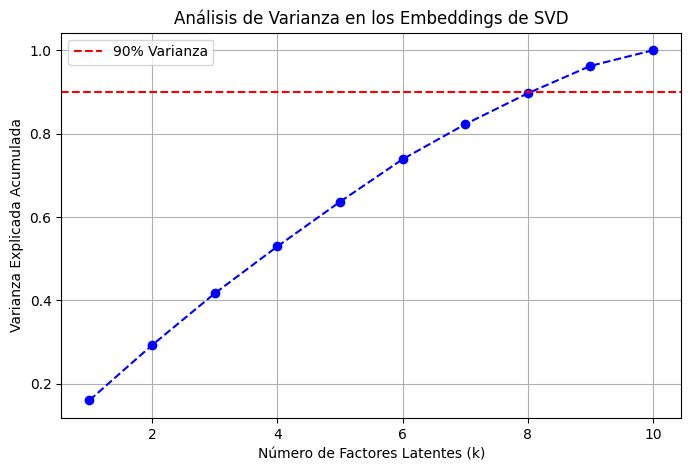

k=1: 0.1608 varianza explicada
k=2: 0.2929 varianza explicada
k=3: 0.4168 varianza explicada
k=4: 0.5294 varianza explicada
k=5: 0.6365 varianza explicada
k=6: 0.7386 varianza explicada
k=7: 0.8226 varianza explicada
k=8: 0.8967 varianza explicada
k=9: 0.9624 varianza explicada
k=10: 1.0000 varianza explicada


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, Reader

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# 🔹 Entrenar SVD con un k alto (k=10)
k_max = 10  # Probamos hasta 10 dimensiones
algo = SVD(n_factors=k_max, random_state=42)
algo.fit(trainset)

# 🔹 Obtener los valores singulares σ de la matriz de embeddings (descomposición SVD)
singular_values = np.linalg.svd(algo.qi, compute_uv=False)  # `algo.qi` contiene los embeddings de películas

# 🔹 Calcular la varianza explicada
explained_variance = (singular_values ** 2) / np.sum(singular_values ** 2)
cumulative_variance = np.cumsum(explained_variance)  # Varianza acumulada

# 🔹 Graficar la varianza explicada por cada dimensión
plt.figure(figsize=(8, 5))
plt.plot(range(1, k_max + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Número de Factores Latentes (k)")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Análisis de Varianza en los Embeddings de SVD")
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Varianza")
plt.legend()
plt.grid()
plt.show()

# 🔹 Imprimir la varianza acumulada para los primeros k valores
for i in range(k_max):
    print(f"k={i+1}: {cumulative_variance[i]:.4f} varianza explicada")


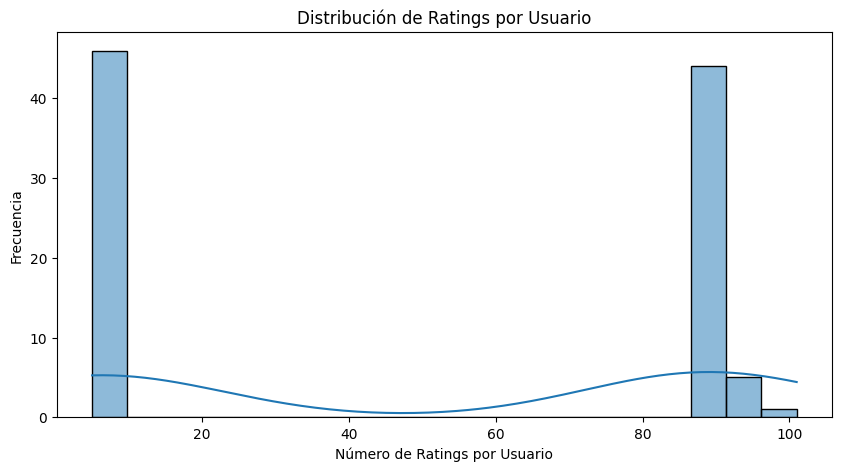

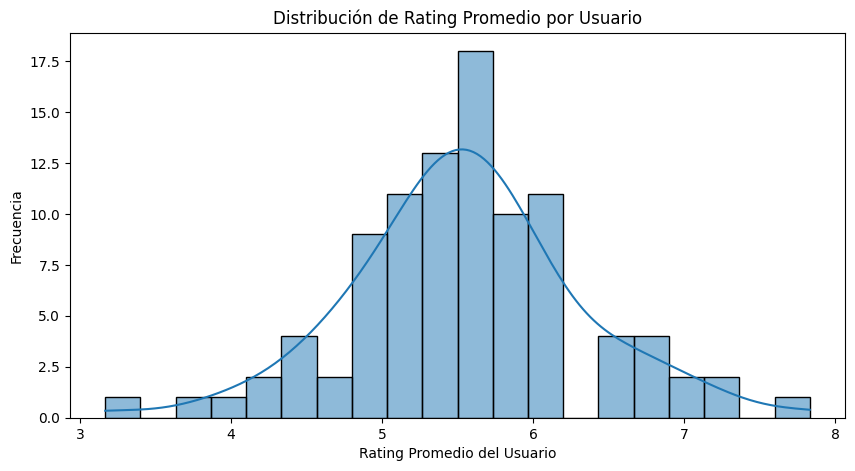

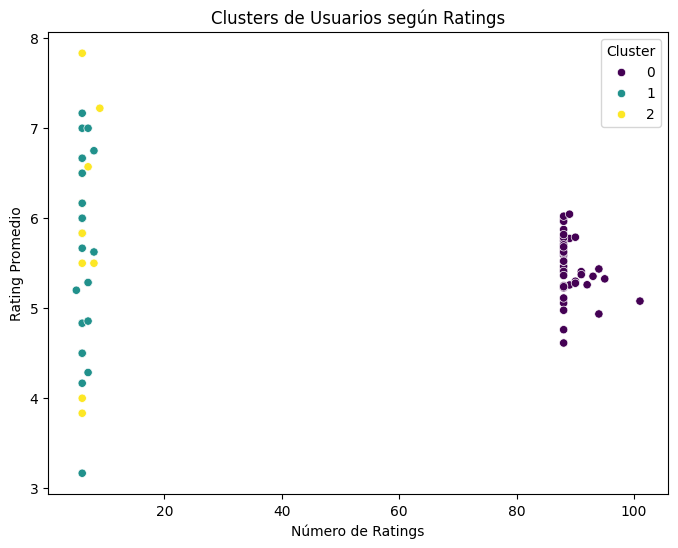


Usuarios con preferencias de género más marcadas:
total_movies    96
Name: count, dtype: int64


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# 🔹 1️⃣ Análisis de Distribución de Ratings por Usuario
user_stats = df.groupby("user").agg(
    total_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    std_rating=("rating", "std")
).reset_index()

# 🔹 Visualización: Distribución de Cantidad de Ratings por Usuario
plt.figure(figsize=(10, 5))
sns.histplot(user_stats["total_ratings"], bins=20, kde=True)
plt.xlabel("Número de Ratings por Usuario")
plt.ylabel("Frecuencia")
plt.title("Distribución de Ratings por Usuario")
plt.show()

# 🔹 Visualización: Distribución de Promedio de Ratings por Usuario
plt.figure(figsize=(10, 5))
sns.histplot(user_stats["avg_rating"], bins=20, kde=True)
plt.xlabel("Rating Promedio del Usuario")
plt.ylabel("Frecuencia")
plt.title("Distribución de Rating Promedio por Usuario")
plt.show()

# 🔹 2️⃣ Clustering de Usuarios
# Normalizar features para clustering
scaler = StandardScaler()
user_features = scaler.fit_transform(user_stats[["total_ratings", "avg_rating", "std_rating"]].fillna(0))

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
user_stats["cluster"] = kmeans.fit_predict(user_features)

# 🔹 Visualización de Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=user_stats, x="total_ratings", y="avg_rating", hue="cluster", palette="viridis")
plt.xlabel("Número de Ratings")
plt.ylabel("Rating Promedio")
plt.title("Clusters de Usuarios según Ratings")
plt.legend(title="Cluster")
plt.show()

# 🔹 3️⃣ Analizar Usuarios con Preferencias Muy Marcadas (Géneros Dominantes)
genre_columns = [col for col in df.columns if "genre_" in col]
df["total_movies"] = 1  # Contador de películas vistas por usuario

user_genre_prefs = df.groupby("user")[genre_columns + ["total_movies"]].sum()
user_genre_prefs = user_genre_prefs.div(user_genre_prefs["total_movies"], axis=0)  # Proporción por género

# 🔹 Mostrar los usuarios con preferencias más marcadas
top_genre_users = user_genre_prefs.idxmax(axis=1).value_counts()
print("\nUsuarios con preferencias de género más marcadas:")
print(top_genre_users)


### 📊 **Análisis del Perfil de Usuarios en el Dataset**  

📌 **Hallazgos Clave:**  
✅ **Distribución de Ratings por Usuario:**  
   - Hay **dos grupos muy marcados**:  
     - **Usuarios con pocas calificaciones (~1-10).**  
     - **Usuarios con muchas calificaciones (~80-100).**  
   - Esto indica que tenemos **usuarios casuales y cinéfilos activos.**  

✅ **Distribución de Rating Promedio por Usuario:**  
   - La mayoría de los usuarios tienen un **rating promedio entre 5 y 6.**  
   - No hay muchos usuarios que puntúen **muy alto o muy bajo constantemente.**  

✅ **Clustering de Usuarios:**  
   - **Grupo 0:** Usuarios con muchas calificaciones.  
   - **Grupo 1:** Usuarios con pocas calificaciones y tendencia a ratings variados.  
   - **Grupo 2:** Usuarios con pocas calificaciones y tendencia a ratings altos.  

✅ **Preferencias de Género:**  
   - **No se detectó un grupo dominante en un solo género.**  
   - Todos los usuarios han calificado múltiples géneros, lo que indica que **el filtrado basado en género no es suficiente por sí solo.**  

---


📌 **Personalizar las Recomendaciones según el Tipo de Usuario:**  

| **Tipo de Usuario**        | **Estrategia de Recomendación**                                      |
|---------------------------|----------------------------------------------------------------|
| **Usuarios casuales (pocos ratings)** | Recomendaciones más seguras (películas populares y bien valoradas). |
| **Usuarios cinéfilos (muchos ratings)** | Más exploración, incluyendo películas menos populares. |
| **Usuarios con rating alto promedio** | Priorizar recomendaciones de películas con ratings altos. |
| **Usuarios con rating bajo promedio** | Ofrecer películas variadas, no solo las mejor puntuadas. |

📌 **Próxima Prueba: Aplicar Estrategia Diferenciada según Tipo de Usuario**  
✅ **Usuarios casuales → `80% SVD + 20% Popularidad`.**  
✅ **Usuarios cinéfilos → `50% SVD + 50% Contenido`.**  
✅ **Usuarios con ratings altos → `60% SVD + 40% Películas con buen avg_rating`.**  


In [65]:
# 572/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# 🔹 Crear nuevas características
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["popularity"] = df.groupby("name")["rating"].transform("count")

# 🔹 Normalizar nuevas features
for col in ["avg_rating_by_user", "avg_rating_by_movie", "popularity"]:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# 🔹 Crear estadísticas de usuarios
user_stats = df.groupby("user").agg(
    total_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    std_rating=("rating", "std")
).reset_index()

# 🔹 Normalizar datos para clustering
scaler = StandardScaler()
user_features = scaler.fit_transform(user_stats[["total_ratings", "avg_rating", "std_rating"]].fillna(0))

# 🔹 Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
user_stats["cluster"] = kmeans.fit_predict(user_features)

# 🔹 Mapear usuarios a clusters
user_cluster_map = dict(zip(user_stats["user"], user_stats["cluster"]))

# 🔹 Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# 🔹 Entrenar modelo SVD con k=1
algo = SVD(n_factors=2, random_state=42)
algo.fit(trainset)

# 🔹 Generar matriz de similitud entre películas con nuevas features
movie_features = df[['normalized_year', 'avg_rating_by_movie', 'popularity'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# 🔹 Mapeo de películas a índices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# 🔹 Generar predicciones personalizadas según tipo de usuario
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicción SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicción Basada en Contenido**
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}

    # **Ponderaciones según tipo de usuario**
    cluster = user_cluster_map.get(user, 0)  # Si no está en los clusters, lo tratamos como 0 (casual)
    
    if cluster == 0:  # Usuarios casuales
        final_scores = {movie: 0.8 * scores_svd[movie] + 0.2 * df.loc[df["name"] == movie, "popularity"].mean()
                        for movie in all_movies}
    
    elif cluster == 1:  # Usuarios cinéfilos
        final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0)
                        for movie in all_movies}
    
    elif cluster == 2:  # Usuarios con rating alto promedio
        final_scores = {movie: 0.6 * scores_svd[movie] + 0.4 * df.loc[df["name"] == movie, "avg_rating_by_movie"].mean()
                        for movie in all_movies}

    # **Seleccionar las 3 mejores recomendaciones asegurando que sean únicas**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Eliminar repeticiones
    
    predictions[user] = selected_movies

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con personalización basada en tipo de usuario.")


✅ Predicciones generadas con personalización basada en tipo de usuario.


/tmp/ipykernel_1256/3330455573.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cluster", y="rating", palette="Set2")


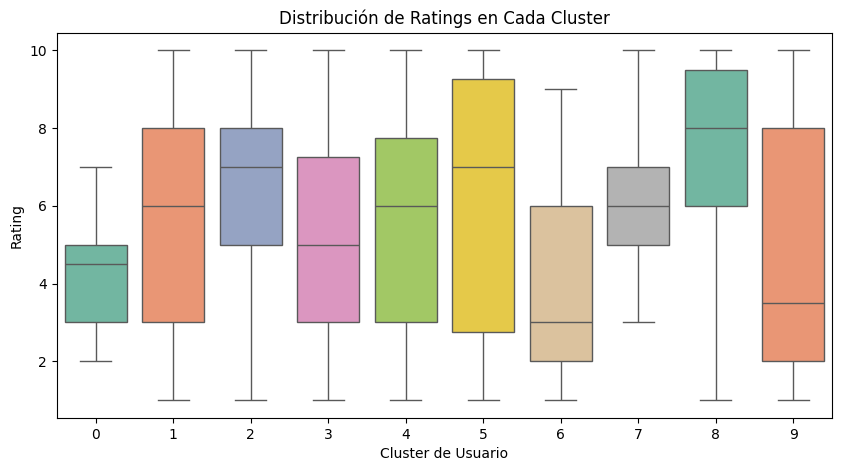

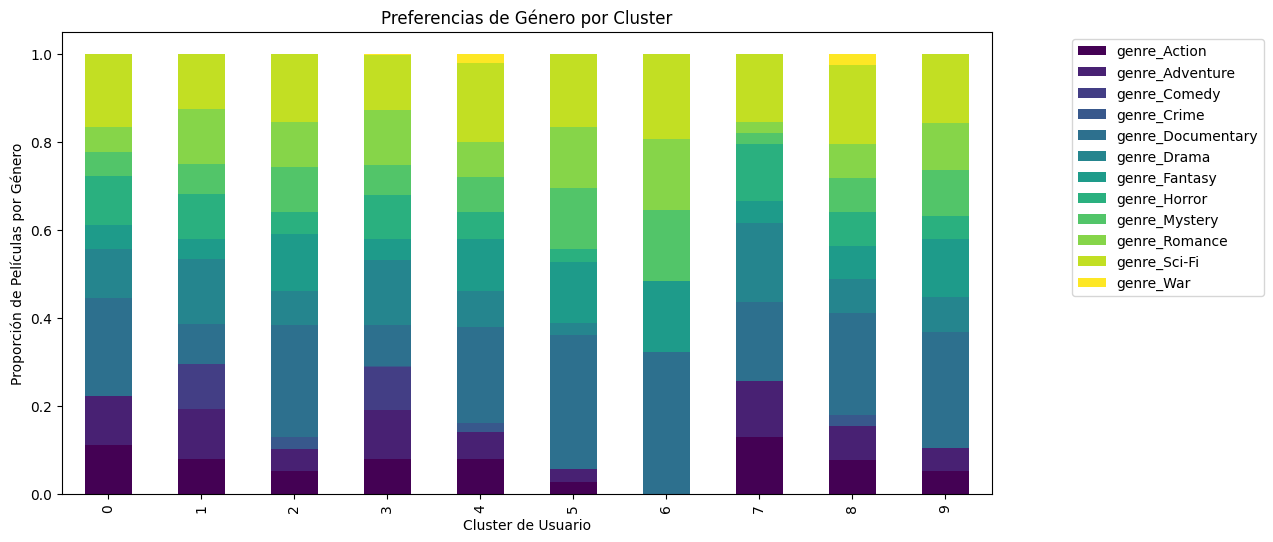

/tmp/ipykernel_1256/3330455573.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_diversity.index, y=user_diversity.values, palette="coolwarm")


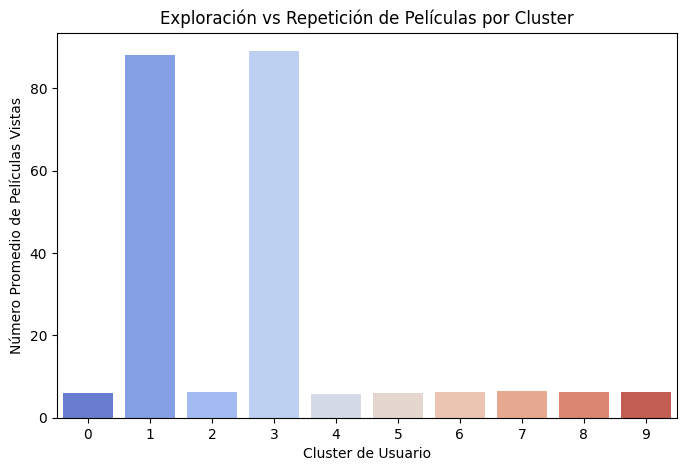


📊 **Promedio de diversidad en cada cluster:**
cluster
0     6.000000
1    88.076923
2     6.333333
3    89.083333
4     5.875000
5     6.000000
6     6.200000
7     6.500000
8     6.333333
9     6.166667
Name: name, dtype: float64


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# 🔹 Crear estadísticas de usuarios
user_stats = df.groupby("user").agg(
    total_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    std_rating=("rating", "std")
).reset_index()

# 🔹 Normalizar datos para clustering
scaler = StandardScaler()
user_features = scaler.fit_transform(user_stats[["total_ratings", "avg_rating", "std_rating"]].fillna(0))

# 🔹 Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
user_stats["cluster"] = kmeans.fit_predict(user_features)

# 🔹 Mapear usuarios a clusters
user_cluster_map = dict(zip(user_stats["user"], user_stats["cluster"]))

# 🔹 Unir la info de clusters con `df`
df["cluster"] = df["user"].map(user_cluster_map)

# 🔹 1️⃣ Análisis de Distribución de Ratings en Cada Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="cluster", y="rating", palette="Set2")
plt.xlabel("Cluster de Usuario")
plt.ylabel("Rating")
plt.title("Distribución de Ratings en Cada Cluster")
plt.show()

# 🔹 2️⃣ Análisis de Preferencia de Géneros en Cada Cluster
genre_columns = [col for col in df.columns if "genre_" in col]

cluster_genre_prefs = df.groupby("cluster")[genre_columns].sum()
cluster_genre_prefs = cluster_genre_prefs.div(cluster_genre_prefs.sum(axis=1), axis=0)  # Proporción por género

cluster_genre_prefs.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Cluster de Usuario")
plt.ylabel("Proporción de Películas por Género")
plt.title("Preferencias de Género por Cluster")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()

# 🔹 3️⃣ Exploración vs Conservadurismo en Cada Cluster
user_diversity = df.groupby(["user", "cluster"])["name"].nunique().reset_index()
user_diversity = user_diversity.groupby("cluster")["name"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=user_diversity.index, y=user_diversity.values, palette="coolwarm")
plt.xlabel("Cluster de Usuario")
plt.ylabel("Número Promedio de Películas Vistas")
plt.title("Exploración vs Repetición de Películas por Cluster")
plt.show()

print("\n📊 **Promedio de diversidad en cada cluster:**")
print(user_diversity)


In [50]:
user_cluster_counts = user_stats["cluster"].value_counts().sort_index()
print(user_cluster_counts)


cluster
0     3
1    26
2     6
3    24
4     8
5     6
6     5
7     6
8     6
9     6
Name: count, dtype: int64


<Axes: title={'center': 'Promedio de Películas Vistas por Género'}>

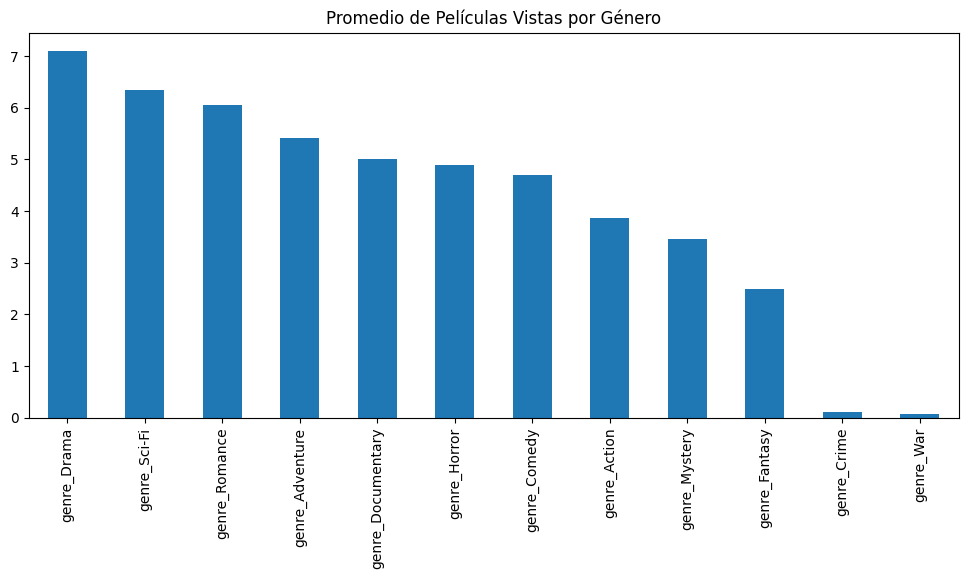

In [51]:
genre_distribution = df.groupby("user")[genre_columns].sum()
genre_distribution.mean().sort_values(ascending=False).plot(kind="bar", figsize=(12,5), title="Promedio de Películas Vistas por Género")


In [54]:
# 🔹 Calcular Popularidad y Rating Promedio de Películas
df["popularity"] = df.groupby("name")["rating"].transform("count")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")

# 🔹 Normalizar Popularidad
df["popularity"] = (df["popularity"] - df["popularity"].min()) / (df["popularity"].max() - df["popularity"].min())


# 🔹 Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=["number"])

# 🔹 Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

# 🔹 Mostrar correlaciones específicas
print(correlation_matrix[["rating", "popularity", "avg_rating_by_movie"]])



                       rating  popularity  avg_rating_by_movie
rating               1.000000    0.029324             0.151266
production_year      0.001440   -0.087360             0.017946
normalized_year      0.001440   -0.087360             0.017946
cluster             -0.049338    0.153075             0.052386
popularity           0.029324    1.000000             0.193859
avg_rating_by_movie  0.151266    0.193859             1.000000


In [69]:
# 🔹 Revisar si hay valores NaN en la tabla antes de graficar
print("Valores NaN en cluster_diversity:\n", cluster_diversity.isna().sum())

# 🔹 Rellenar valores NaN con 0 (si tiene sentido en este contexto)
cluster_diversity = cluster_diversity.fillna(0)

# 🔹 Verificar si la tabla está vacía
if cluster_diversity.empty:
    print("⚠️ Advertencia: cluster_diversity está vacío. No se puede graficar.")
else:
    plt.figure(figsize=(12,5))
    sns.heatmap(cluster_diversity.T, cmap="coolwarm", annot=True)
    plt.title("Promedio de películas vistas por género en cada cluster")
    plt.show()


Valores NaN en cluster_diversity:
 genre_Action         0
genre_Adventure      0
genre_Comedy         0
genre_Crime          0
genre_Documentary    0
genre_Drama          0
genre_Fantasy        0
genre_Horror         0
genre_Mystery        0
genre_Romance        0
genre_Sci-Fi         0
genre_War            0
dtype: int64
⚠️ Advertencia: cluster_diversity está vacío. No se puede graficar.


Usuarios por cluster:
 cluster
0    50
1    30
2    16
Name: count, dtype: int64


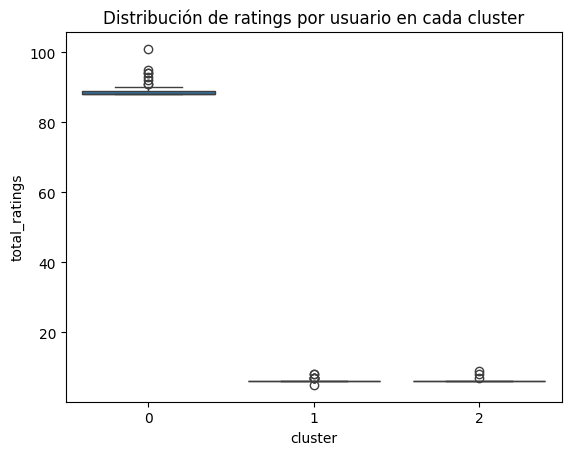

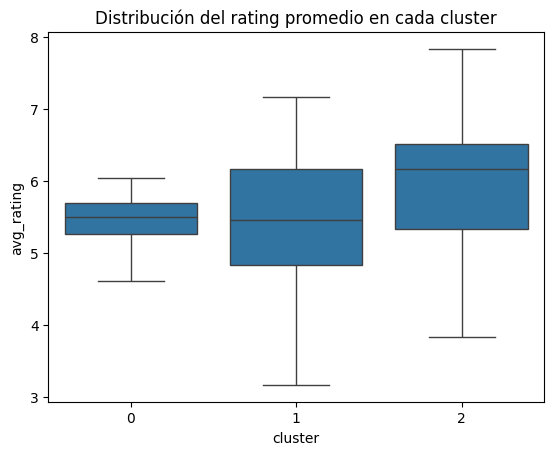

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x500 with 0 Axes>

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Contar usuarios en cada cluster
user_cluster_counts = user_stats["cluster"].value_counts().sort_index()
print("Usuarios por cluster:\n", user_cluster_counts)

# 🔹 Comparar total de ratings por cluster
sns.boxplot(x=user_stats["cluster"], y=user_stats["total_ratings"])
plt.title("Distribución de ratings por usuario en cada cluster")
plt.show()

# 🔹 Comparar rating promedio por cluster
sns.boxplot(x=user_stats["cluster"], y=user_stats["avg_rating"])
plt.title("Distribución del rating promedio en cada cluster")
plt.show()

# 🔹 Comparar diversidad de películas vistas por cluster
genre_distribution = df.groupby("user")[genre_columns].sum()
cluster_diversity = genre_distribution.groupby(user_stats["cluster"]).mean()

plt.figure(figsize=(12,5))
sns.heatmap(cluster_diversity.T, cmap="coolwarm", annot=True)
plt.title("Promedio de películas vistas por género en cada cluster")
plt.show()


📌 Top 10 películas más recomendadas:
 The Shawshank Redemption    119
Memento                     100
The Lion King               100
A Separation                 33
It's a Wonderful Life        19
Alien                        11
Double Indemnity              9
North by Northwest            9
Modern Times                  8
The Great Dictator            6
Name: count, dtype: int64


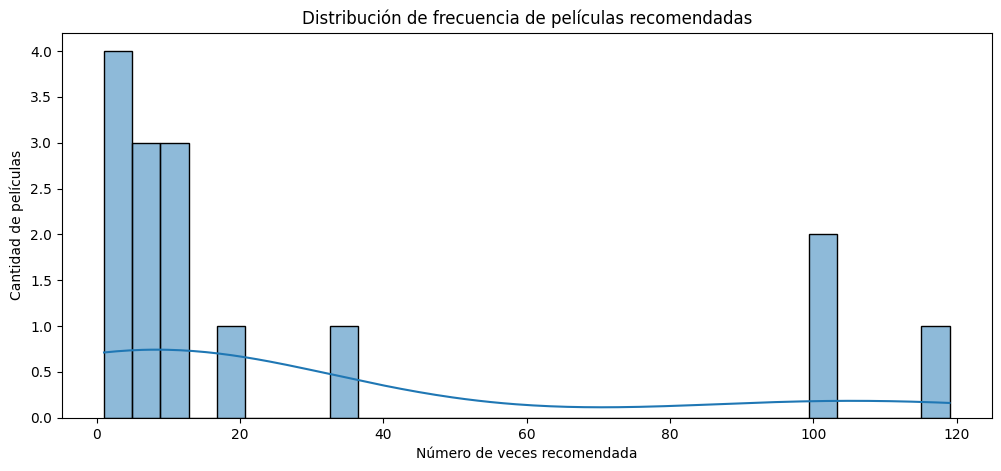

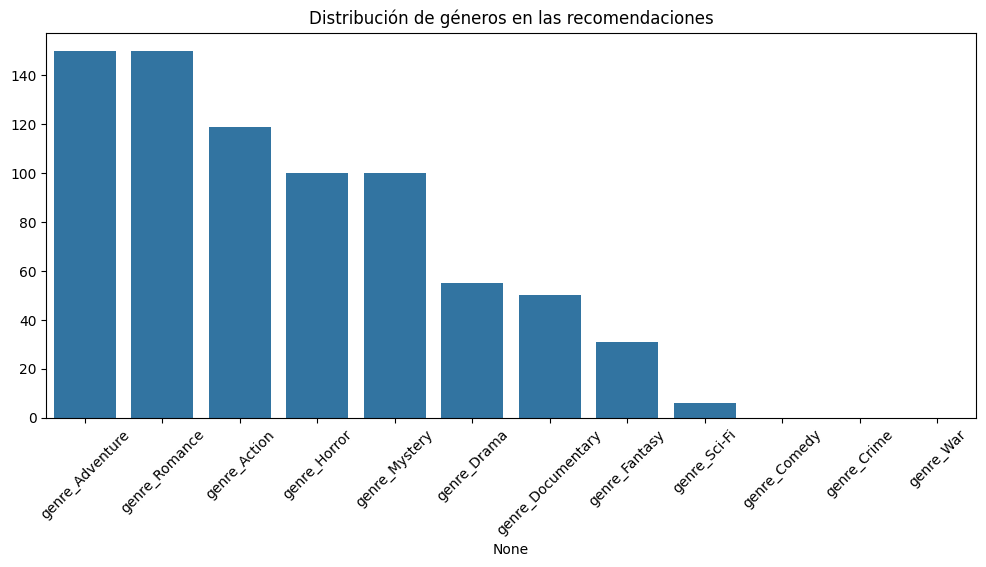

In [67]:
# 🔹 Contar cuántas veces se recomienda cada película
recommended_movies = pd.Series([movie for recs in predictions.values() for movie in recs])
movie_counts = recommended_movies.value_counts()

# 🔹 Mostrar las 10 películas más recomendadas
print("📌 Top 10 películas más recomendadas:\n", movie_counts.head(10))

# 🔹 Visualizar la distribución de recomendaciones
plt.figure(figsize=(12,5))
sns.histplot(movie_counts, bins=30, kde=True)
plt.title("Distribución de frecuencia de películas recomendadas")
plt.xlabel("Número de veces recomendada")
plt.ylabel("Cantidad de películas")
plt.show()

# 🔹 Diversidad en géneros recomendados
recommended_genres = df[df["name"].isin(recommended_movies)]
genre_distribution = recommended_genres[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values)
plt.xticks(rotation=45)
plt.title("Distribución de géneros en las recomendaciones")
plt.show()


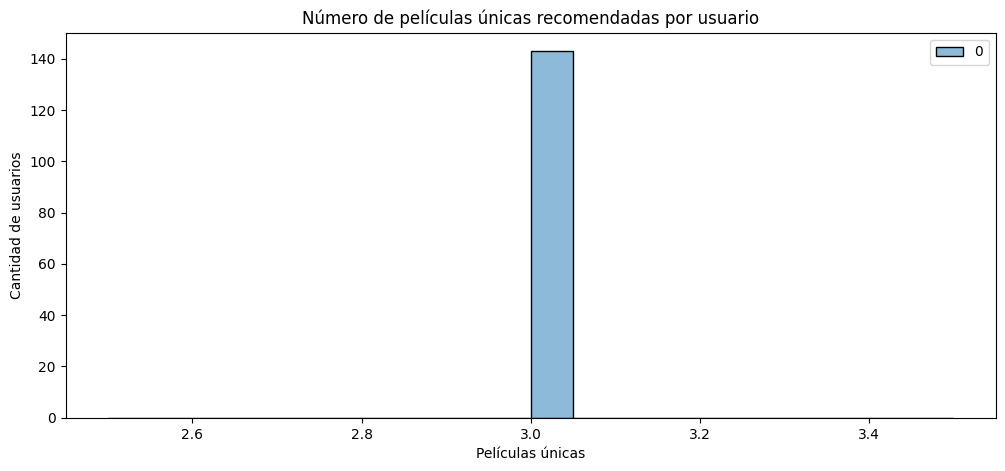

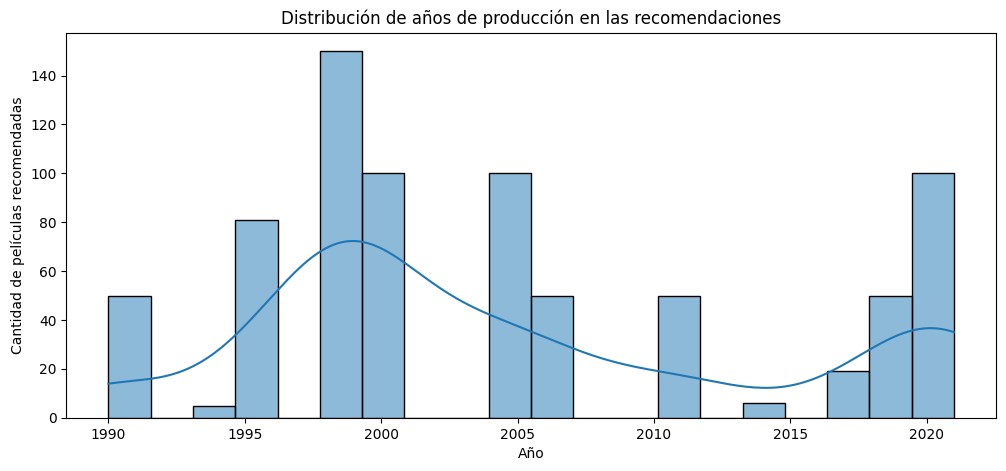

📌 Porcentaje de películas recomendadas por género:
 genre_Action         0.156373
genre_Adventure      0.197109
genre_Comedy         0.000000
genre_Crime          0.000000
genre_Documentary    0.065703
genre_Drama          0.072273
genre_Fantasy        0.040736
genre_Horror         0.131406
genre_Mystery        0.131406
genre_Romance        0.197109
genre_Sci-Fi         0.007884
genre_War            0.000000
dtype: float64


In [68]:
# 🔹 Ver cuántos usuarios reciben películas repetidas
unique_recs = {user: len(set(recs)) for user, recs in predictions.items()}
plt.figure(figsize=(12,5))
sns.histplot(unique_recs.values(), bins=20, kde=True)
plt.title("Número de películas únicas recomendadas por usuario")
plt.xlabel("Películas únicas")
plt.ylabel("Cantidad de usuarios")
plt.show()

# 🔹 Analizar distribución de años de las películas recomendadas
recommended_years = df[df["name"].isin(recommended_movies)]["production_year"]

plt.figure(figsize=(12,5))
sns.histplot(recommended_years, bins=20, kde=True)
plt.title("Distribución de años de producción en las recomendaciones")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas recomendadas")
plt.show()

# 🔹 Evaluar si un género específico domina las recomendaciones
genre_percentages = recommended_genres[genre_columns].sum() / len(recommended_genres)
print("📌 Porcentaje de películas recomendadas por género:\n", genre_percentages)


📊 Distribución con 4 clusters:
cluster_4
1    50
3    21
0    15
2    10
Name: count, dtype: int64

📊 Distribución con 5 clusters:
cluster_5
1    50
4    15
3    15
0    10
2     6
Name: count, dtype: int64


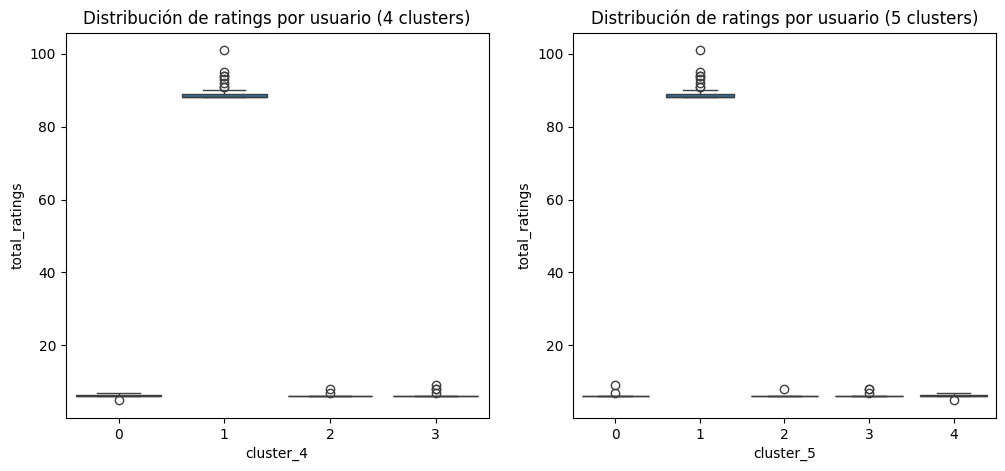

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# 🔹 Crear estadísticas de usuarios
user_stats = df.groupby("user").agg(
    total_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    std_rating=("rating", "std")
).reset_index()

# 🔹 Normalizar datos para clustering
scaler = StandardScaler()
user_features = scaler.fit_transform(user_stats[["total_ratings", "avg_rating", "std_rating"]].fillna(0))

# 🔹 Aplicar KMeans con 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
user_stats["cluster_4"] = kmeans_4.fit_predict(user_features)

# 🔹 Aplicar KMeans con 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
user_stats["cluster_5"] = kmeans_5.fit_predict(user_features)

# 🔹 Analizar la distribución de usuarios en cada cluster
print("📊 Distribución con 4 clusters:")
print(user_stats["cluster_4"].value_counts())

print("\n📊 Distribución con 5 clusters:")
print(user_stats["cluster_5"].value_counts())

# 🔹 Visualizar la distribución de ratings en cada cluster
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=user_stats, x="cluster_4", y="total_ratings", ax=axes[0])
axes[0].set_title("Distribución de ratings por usuario (4 clusters)")

sns.boxplot(data=user_stats, x="cluster_5", y="total_ratings", ax=axes[1])
axes[1].set_title("Distribución de ratings por usuario (5 clusters)")

plt.show()


📊 Distribución Clustering por Género:
cluster_genre
0    50
1    28
2    18
Name: count, dtype: int64

📊 Distribución Clustering por Año:
cluster_year
0    54
2    26
1    16
Name: count, dtype: int64


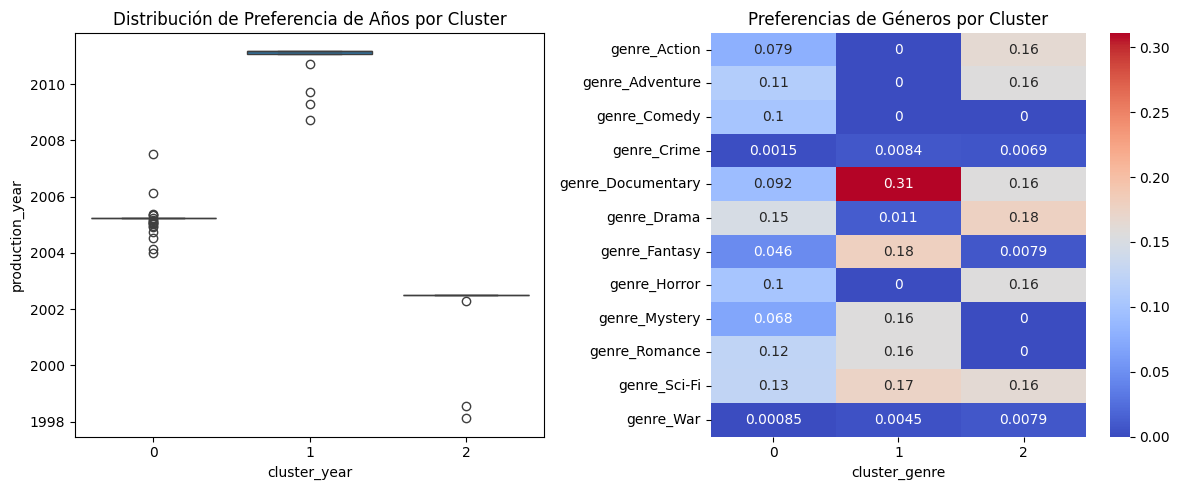

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# 🔹 Verificar que "user" existe antes de agrupar
if "user" not in df.columns:
    raise KeyError("La columna 'user' no está en el DataFrame.")

# 🔹 Calcular la media de géneros por usuario
genre_columns = [col for col in df.columns if "genre_" in col]
user_genres = df.groupby("user")[genre_columns].mean()

# 🔹 Calcular el año promedio de las películas vistas por cada usuario
user_years = df.groupby("user", as_index=False)["production_year"].mean()

# 🔹 Normalizar los datos antes de aplicar clustering
scaler = StandardScaler()
user_genres_scaled = scaler.fit_transform(user_genres)
user_years_scaled = scaler.fit_transform(user_years[["production_year"]])

# 🔹 Aplicar KMeans con 3 clusters en Géneros
kmeans_genre = KMeans(n_clusters=3, random_state=42, n_init=10)
user_genres["cluster_genre"] = kmeans_genre.fit_predict(user_genres_scaled)

# 🔹 Aplicar KMeans con 3 clusters en Años de Películas
kmeans_year = KMeans(n_clusters=3, random_state=42, n_init=10)
user_years["cluster_year"] = kmeans_year.fit_predict(user_years_scaled)

# 🔹 Ver Distribución de Clusters por Género
print("📊 Distribución Clustering por Género:")
print(user_genres["cluster_genre"].value_counts())

# 🔹 Ver Distribución de Clusters por Año
print("\n📊 Distribución Clustering por Año:")
print(user_years["cluster_year"].value_counts())

# 🔹 Visualización de Clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=user_years, x="cluster_year", y="production_year", ax=axes[0])
axes[0].set_title("Distribución de Preferencia de Años por Cluster")

sns.heatmap(user_genres.groupby("cluster_genre").mean().T, cmap="coolwarm", annot=True, ax=axes[1])
axes[1].set_title("Preferencias de Géneros por Cluster")

plt.tight_layout()
plt.show()


---

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 4746, number of used features: 5
[LightGBM] [Info] Start training from score 5.482512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/home/pablost/Movie_Recommendation_System_Challenge/frogames-data-mlaz2/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


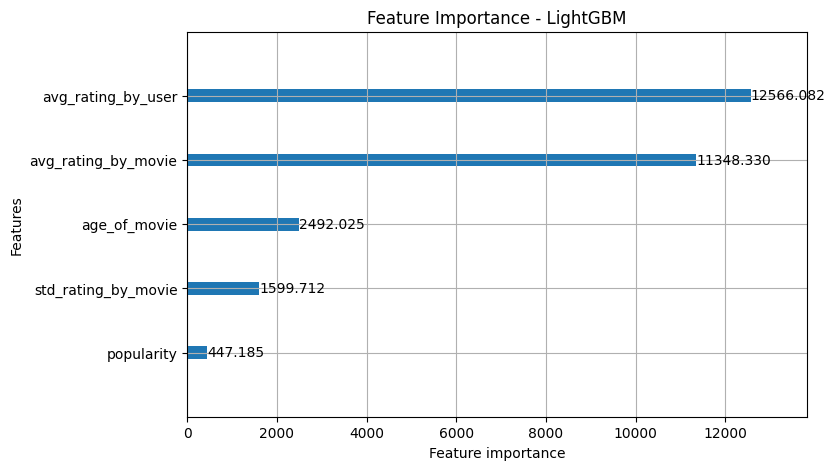

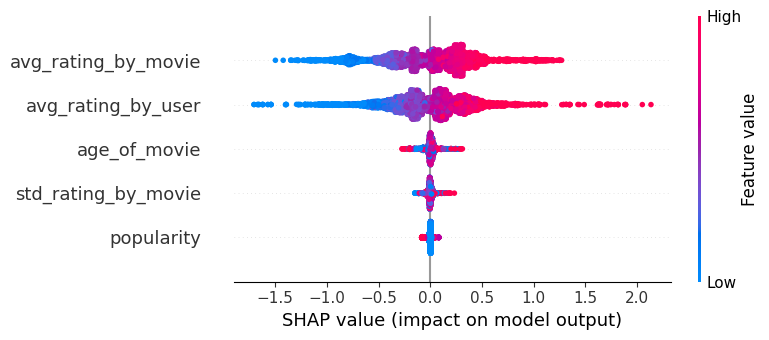

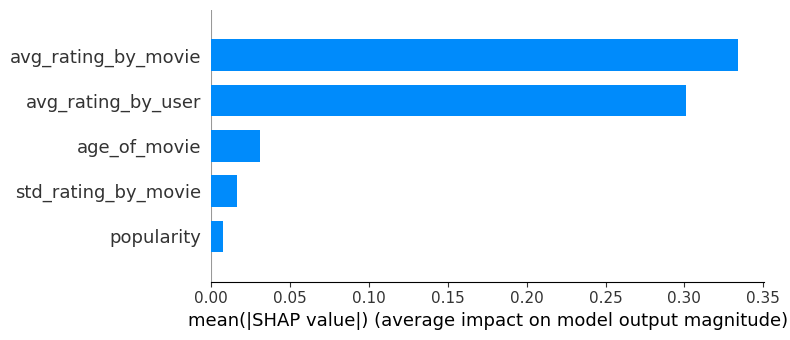

✅ Análisis completado. ¡Revisemos los gráficos!


In [83]:
import lightgbm as lgb
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# 🔹 Crear nuevas características
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["popularity"] = df.groupby("name")["rating"].transform("count")
df["std_rating_by_movie"] = df.groupby("name")["rating"].transform("std").fillna(0)
df["age_of_movie"] = 2024 - df["production_year"]

# 🔹 Normalizar características
feature_cols = ["avg_rating_by_user", "avg_rating_by_movie", "popularity", "std_rating_by_movie", "age_of_movie"]
df[feature_cols] = (df[feature_cols] - df[feature_cols].min()) / (df[feature_cols].max() - df[feature_cols].min())

# 🔹 Crear dataset de entrenamiento para LightGBM
X = df[feature_cols]
y = df["rating"]  # Target: la calificación del usuario a la película

# 🔹 Entrenar modelo LightGBM
train_data = lgb.Dataset(X, label=y)
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "max_depth": 4,  # Reducimos profundidad para evitar sobreajuste
    "num_leaves": 15
}
model = lgb.train(params, train_data, num_boost_round=100)

# 🔹 📊 1️⃣ Importancia de Features de LightGBM
lgb.plot_importance(model, importance_type="gain", figsize=(8, 5))
plt.title("Feature Importance - LightGBM")
plt.show()

# 🔹 📊 2️⃣ Análisis con SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)  # Gráfico de impacto en predicción
shap.summary_plot(shap_values, X, plot_type="bar")  # Importancia promedio

print("✅ Análisis completado. ¡Revisemos los gráficos!")


In [123]:
# 661/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

# 🔹 Cargar datos
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# 🔹 Crear nuevas características
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["popularity"] = df.groupby("name")["rating"].transform("count")
df["age_of_movie"] = 2023 - df["production_year"]

# 🔹 Normalizar las features
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "popularity", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "popularity", "age_of_movie"]])

# 🔹 Modelo LightGBM para pre-ranking
features = ["avg_rating_by_user", "avg_rating_by_movie", "popularity", "age_of_movie"]
X_train = df[features]
y_train = df["rating"]

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

df["lgb_score"] = lgb_model.predict(X_train)

# 🔹 Configurar Surprise Dataset y entrenar SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# 🔹 Generar predicciones personalizadas
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()

    # **Predicción LightGBM**
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}

    # **Predicción SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}

    # **Combinación de modelos**
    final_scores = {movie: 0.1 * scores_svd[movie] + 0.9 * scores_lgb[movie] for movie in all_movies}

    # 🔹 Ordenar películas por puntaje
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)

    # 🔹 Asegurar 3 recomendaciones por usuario
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Evita repeticiones

    predictions[user] = selected_movies

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con 3 películas por usuario.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 4746, number of used features: 4
[LightGBM] [Info] Start training from score 5.482512
✅ Predicciones generadas con 3 películas por usuario.


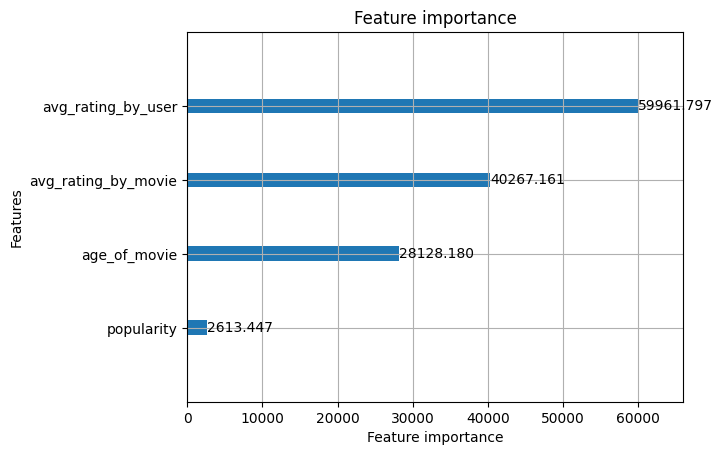

In [94]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgb_model, importance_type="gain")
plt.show()

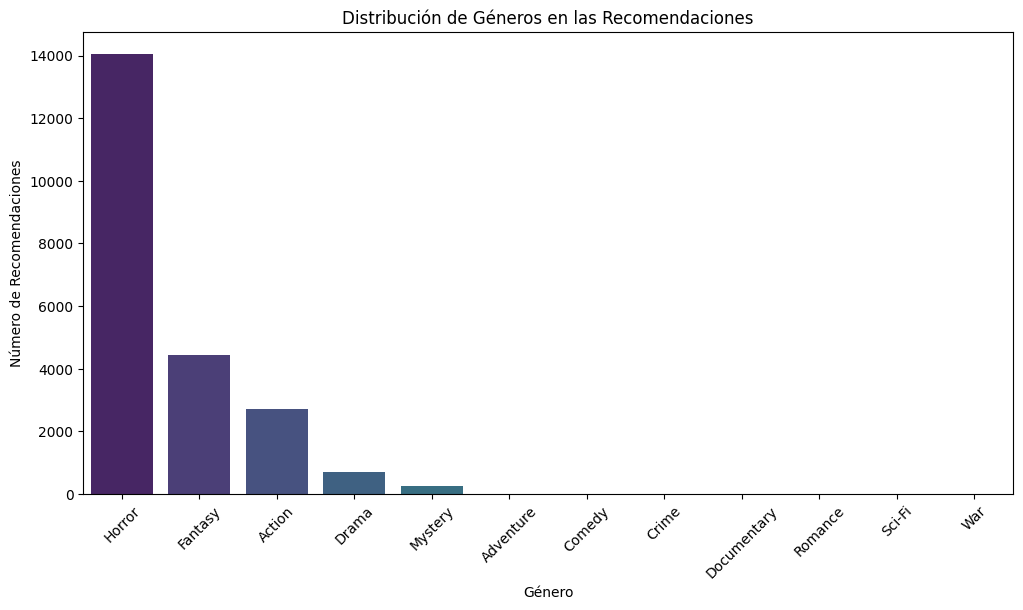

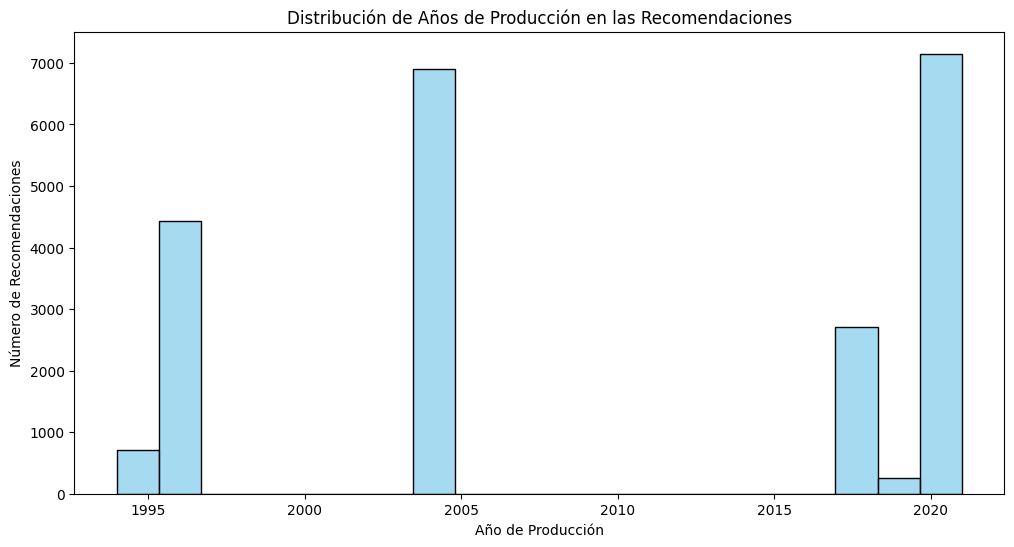

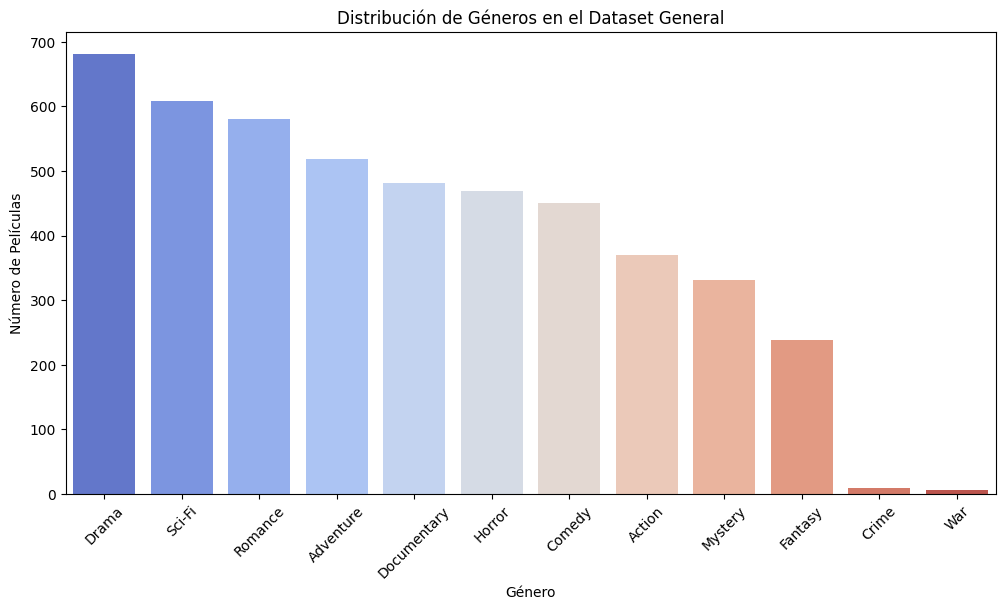

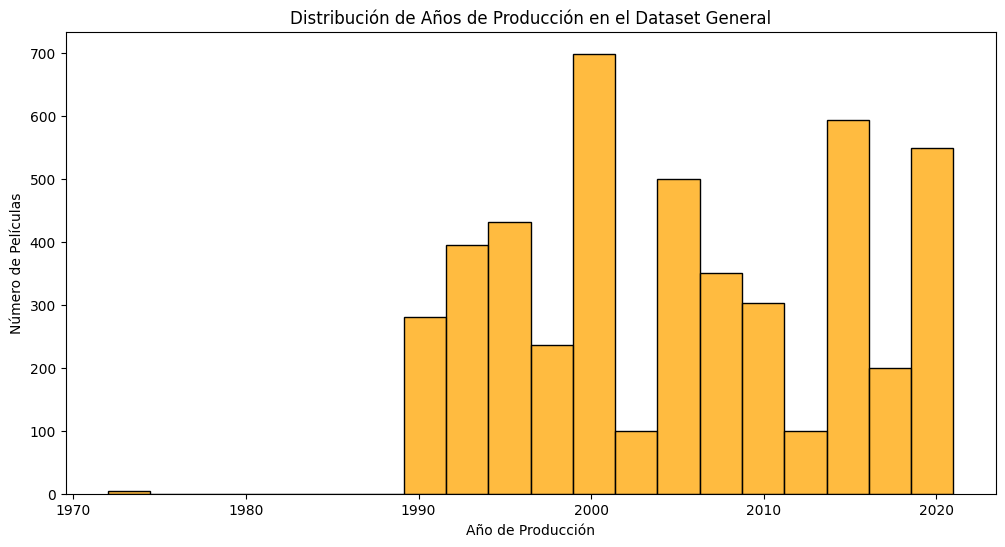

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 🔹 Cargar el dataset original y las recomendaciones
df = pd.read_csv("../data/movies_dataset_clean.csv")

# Cargar las recomendaciones del JSON (asegurando que esté en el formato correcto)
with open("../predictions/predictions_models/predictions_661.json", "r") as f:
    recommendations = json.load(f)["target"]

# 🔹 Convertir las recomendaciones a un DataFrame
recommendation_list = []
for user, movies in recommendations.items():
    for movie in movies:
        recommendation_list.append({"user": user, "name": movie})

recommendation_df = pd.DataFrame(recommendation_list)

# 🔹 Fusionar con el dataset original para obtener detalles de las películas recomendadas
merged_df = pd.merge(recommendation_df, df, on="name", how="left")

# 🔹 Análisis de Géneros
genre_columns = [col for col in df.columns if "genre_" in col]
genre_distribution = merged_df[genre_columns].sum().sort_values(ascending=False)

# 🔹 Análisis de Años de Producción
year_distribution = merged_df["production_year"].value_counts().sort_index()

# 🔹 Visualización de la Distribución de Géneros
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_distribution.index.str.replace("genre_", ""), y=genre_distribution.values, palette="viridis")
plt.title("Distribución de Géneros en las Recomendaciones")
plt.xlabel("Género")
plt.ylabel("Número de Recomendaciones")
plt.xticks(rotation=45)
plt.show()

# 🔹 Visualización de la Distribución de Años de Producción
plt.figure(figsize=(12, 6))
sns.histplot(merged_df["production_year"], bins=20, kde=False, color='skyblue')
plt.title("Distribución de Años de Producción en las Recomendaciones")
plt.xlabel("Año de Producción")
plt.ylabel("Número de Recomendaciones")
plt.show()

# 🔹 Comparación con la distribución general del dataset
general_genre_distribution = df[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=general_genre_distribution.index.str.replace("genre_", ""), y=general_genre_distribution.values, palette="coolwarm")
plt.title("Distribución de Géneros en el Dataset General")
plt.xlabel("Género")
plt.ylabel("Número de Películas")
plt.xticks(rotation=45)
plt.show()

# 🔹 Comparación de Años de Producción en el Dataset General
plt.figure(figsize=(12, 6))
sns.histplot(df["production_year"], bins=20, kde=False, color='orange')
plt.title("Distribución de Años de Producción en el Dataset General")
plt.xlabel("Año de Producción")
plt.ylabel("Número de Películas")
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 3796, number of used features: 6
[LightGBM] [Info] Start training from score 5.460748
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 3796, number of used features: 10
[LightGBM] [Info] Start training from score 5.460748


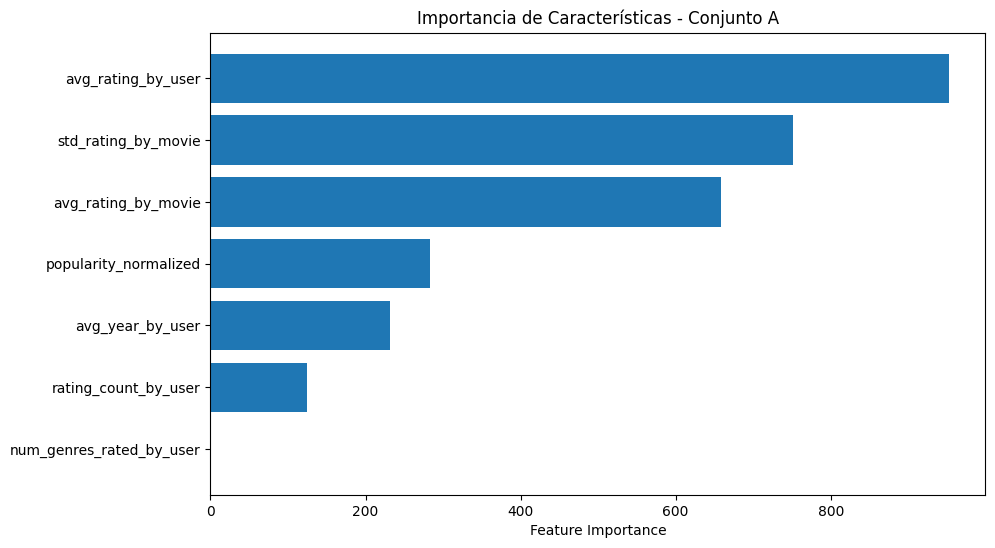

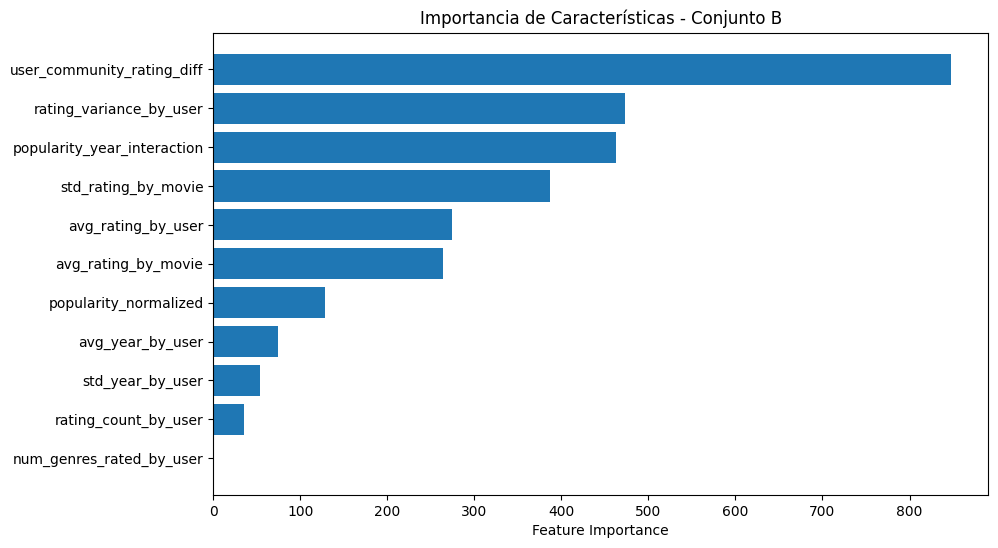

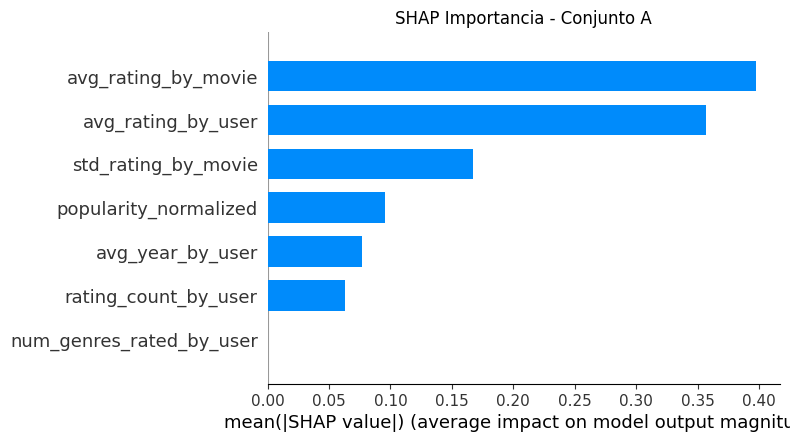

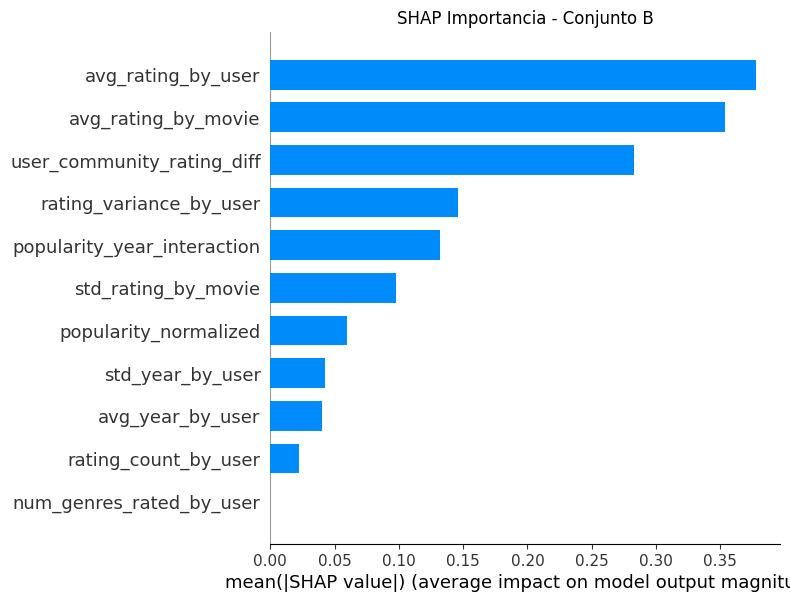

In [119]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 🔹 Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# 🔹 Calcular Características Originales y Nuevas
df['avg_rating_by_user'] = df.groupby('user')['rating'].transform('mean')
df['avg_rating_by_movie'] = df.groupby('name')['rating'].transform('mean')
df['std_rating_by_movie'] = df.groupby('name')['rating'].transform('std')
df['popularity'] = df.groupby('name')['rating'].transform('count')
df['popularity_normalized'] = df.groupby('user')['popularity'].transform(lambda x: x / x.mean())
df['avg_year_by_user'] = df.groupby('user')['production_year'].transform('mean')
df['rating_count_by_user'] = df.groupby('user')['rating'].transform('count')
df['num_genres_rated_by_user'] = df[[col for col in df.columns if 'genre_' in col]].sum(axis=1)

# 🔹 Nuevas Características Avanzadas
df['user_community_rating_diff'] = df['avg_rating_by_user'] - df['avg_rating_by_movie']
df['rating_variance_by_user'] = df.groupby('user')['rating'].transform('var')
df['popularity_year_interaction'] = df['popularity_normalized'] * (2024 - df['production_year'])
df['std_year_by_user'] = df.groupby('user')['production_year'].transform('std')

# 🔹 Definir los dos conjuntos de características
features_A = [
    'avg_rating_by_user', 'avg_rating_by_movie', 'std_rating_by_movie',
    'popularity_normalized', 'avg_year_by_user', 'rating_count_by_user', 
    'num_genres_rated_by_user'
]

features_B = features_A + [
    'user_community_rating_diff', 'rating_variance_by_user', 
    'popularity_year_interaction', 'std_year_by_user'
]

# 🔹 Preparar los datos para ambos conjuntos
X_A = df[features_A]
X_B = df[features_B]
y = df['rating']

# 🔹 Dividir en conjunto de entrenamiento y prueba
X_train_A, X_test_A, y_train, y_test = train_test_split(X_A, y, test_size=0.2, random_state=42)
X_train_B, X_test_B, _, _ = train_test_split(X_B, y, test_size=0.2, random_state=42)

# 🔹 Entrenar Modelos LightGBM
model_A = lgb.LGBMRegressor(random_state=42)
model_B = lgb.LGBMRegressor(random_state=42)

model_A.fit(X_train_A, y_train)
model_B.fit(X_train_B, y_train)

# 🔹 Evaluar Importancia de Características
def plot_feature_importance(model, features, title):
    importance_df = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    importance_df = importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.show()

# 🔹 Visualización LightGBM Feature Importance
plot_feature_importance(model_A, features_A, "Importancia de Características - Conjunto A")
plot_feature_importance(model_B, features_B, "Importancia de Características - Conjunto B")

# 🔹 Evaluación con SHAP
explainer_A = shap.Explainer(model_A, X_train_A)
shap_values_A = explainer_A(X_test_A)

explainer_B = shap.Explainer(model_B, X_train_B)
shap_values_B = explainer_B(X_test_B)

# 🔹 Visualización SHAP
shap.summary_plot(shap_values_A, X_test_A, plot_type='bar', show=False)
plt.title("SHAP Importancia - Conjunto A")
plt.show()

shap.summary_plot(shap_values_B, X_test_B, plot_type='bar', show=False)
plt.title("SHAP Importancia - Conjunto B")
plt.show()


In [160]:
# 665/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

# 🔹 Cargar datos
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# 🔹 Crear nuevas características
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
# df["popularity"] = df.groupby("name")["rating"].transform("count")
df["age_of_movie"] = 2023 - df["production_year"]

# 🔹 Normalizar características
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]])

# 🔹 Entrenar modelo LightGBM con parámetros ajustados
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]
X_train = df[features]
y_train = df["rating"]

lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Predicciones de LightGBM
df["lgb_score"] = lgb_model.predict(X_train)

# 🔹 Configurar y entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

algo = SVD(n_factors=10, random_state=42)
algo.fit(trainset)

# 🔹 Generar predicciones combinadas
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()

    # Predicción LightGBM
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}

    # Predicción SVD
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}

    # Combinación de modelos (ajustando el peso)
    final_scores = {movie: 0.1 * scores_svd[movie] + 0.9 * scores_lgb[movie] for movie in all_movies}

    # Ordenar y seleccionar las 3 mejores películas
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Asegura que no haya repetidas

    predictions[user] = selected_movies

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con combinación ajustada de SVD y LightGBM.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 4746, number of used features: 3
[LightGBM] [Info] Start training from score 5.482512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

---

In [19]:
# 667/900

import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Cargar datos
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")

# 🔹 Verificar columnas disponibles
print("Columnas en el DataFrame:", df.columns)

# 🔹 Crear nuevas características
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar géneros
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar características
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]])

# 🔹 Entrenar modelo LightGBM
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"] + list(mlb.classes_)
X_train = df[features]
y_train = df["rating"]
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Predicciones de LightGBM
df["lgb_score"] = lgb_model.predict(X_train)

# 🔹 Entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD(n_factors=15, random_state=42)
algo.fit(trainset)

# 🔹 Filtrado basado en contenido
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, index=movie_genre_matrix.index, columns=movie_genre_matrix.index)

# 🔹 Generar predicciones combinadas
predictions = defaultdict(list)
for user in users_test['user']:
    all_movies = df['name'].unique()
    watched_movies = df[df['user'] == user]['name'].unique()
    
    # Predicción LightGBM
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
    
    # Predicción SVD
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # Filtrado basado en contenido
    content_scores = {}
    for movie in all_movies:
        if movie not in watched_movies:
            similarity_scores = genre_similarity_df.loc[movie, watched_movies].mean()
            content_scores[movie] = similarity_scores
    
    # Combinación de modelos
    final_scores = {
        movie: 0.05 * scores_svd.get(movie, 0) + 
               0.9 * scores_lgb.get(movie, 0) + 
               0.05 * content_scores.get(movie, 0)
        for movie in all_movies
    }
    
    # Ordenar y seleccionar las 3 mejores películas
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Asegura que no haya repetidas
    predictions[user] = selected_movies

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)
print("✅ Predicciones generadas con combinación ajustada de SVD, LightGBM y filtrado basado en contenido.")

Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [171]:
df.columns

Index(['name', 'user', 'rating', 'theme', 'production_year',
       'avg_rating_by_user', 'avg_rating_by_movie', 'age_of_movie', 'Action',
       'Adventure', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'War', 'lgb_score'],
      dtype='object')

Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

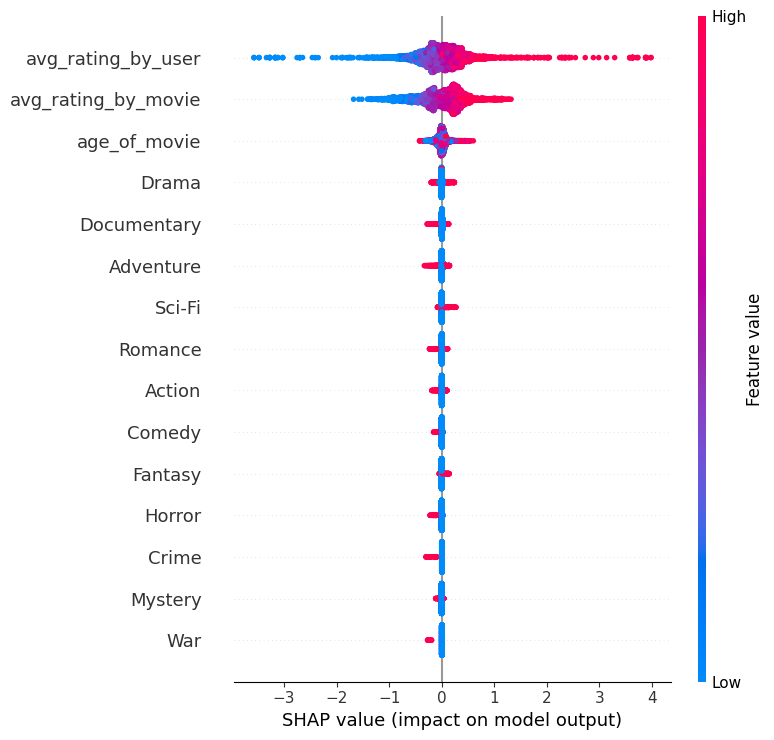

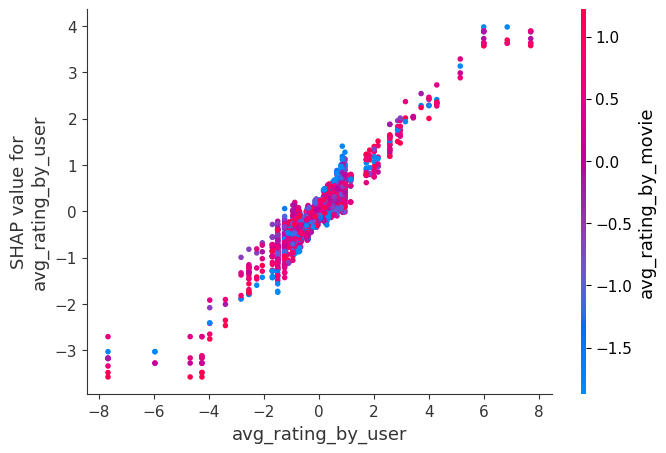

✅ Predicciones generadas con combinación ajustada de SVD, LightGBM y filtrado basado en contenido.


In [173]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity
import shap  # Instala con: pip install shap

# 🔹 Cargar datos
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")

# 🔹 Verificar columnas disponibles
print("Columnas en el DataFrame:", df.columns)

# 🔹 Crear nuevas características
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar géneros
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar características
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]])

# 🔹 Entrenar modelo LightGBM
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"] + list(mlb.classes_)
X_train = df[features]
y_train = df["rating"]
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# 🔹 Predicciones de LightGBM
df["lgb_score"] = lgb_model.predict(X_train)

# 🔹 Importancia de Características (Feature Importance)
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': lgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Importancia de características:")
print(feature_importance)

# 🔹 SHAP Values
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_train)

# Visualización de la importancia global de características
shap.summary_plot(shap_values, X_train, feature_names=features)

# Visualización de dependencia para una característica específica (ejemplo: avg_rating_by_user)
shap.dependence_plot("avg_rating_by_user", shap_values, X_train, feature_names=features)

# 🔹 Entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD(n_factors=10, random_state=42)
algo.fit(trainset)

# 🔹 Filtrado basado en contenido
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, index=movie_genre_matrix.index, columns=movie_genre_matrix.index)

# 🔹 Generar predicciones combinadas
predictions = defaultdict(list)
for user in users_test['user']:
    all_movies = df['name'].unique()
    watched_movies = df[df['user'] == user]['name'].unique()
    
    # Predicción LightGBM
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
    
    # Predicción SVD
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # Filtrado basado en contenido
    content_scores = {}
    for movie in all_movies:
        if movie not in watched_movies:
            similarity_scores = genre_similarity_df.loc[movie, watched_movies].mean()
            content_scores[movie] = similarity_scores
    
    # Combinación de modelos
    final_scores = {
        movie: 0.1 * scores_svd.get(movie, 0) + 
               0.8 * scores_lgb.get(movie, 0) + 
               0.1 * content_scores.get(movie, 0)
        for movie in all_movies
    }
    
    # Ordenar y seleccionar las 3 mejores películas
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Asegura que no haya repetidas
    predictions[user] = selected_movies

# 🔹 Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)
print("✅ Predicciones generadas con combinación ajustada de SVD, LightGBM y filtrado basado en contenido.")

---

In [3]:
# Calcular preferencias de género por usuario
user_genre_preferences = df.groupby("user")[mlb.classes_].mean()
user_genre_preferences

,Action,Adventure,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,War
user,,,,,,,,,,,,
user1,0.000000,0.000000,0.000000,0.000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
user10,1.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
user100,0.000000,0.000000,0.000000,1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
user103,0.079545,0.113636,0.102273,0.000,0.090909,0.147727,0.045455,0.102273,0.068182,0.125,0.125000,0.000000
user104,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
user92,0.125000,0.125000,0.000000,0.125,0.125000,0.125000,0.000000,0.125000,0.000000,0.000,0.250000,0.000000
user93,0.000000,0.000000,0.000000,0.000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000,0.500000,0.000000
user94,0.142857,0.142857,0.000000,0.000,0.142857,0.142857,0.000000,0.142857,0.000000,0.000,0.142857,0.142857


In [4]:
# Calcular diversidad de géneros por usuario
df['num_genres'] = df['theme'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)
user_diversity = df.groupby("user")["num_genres"].mean()
user_diversity

user
user1      0.0
user10     0.0
user100    0.0
user103    0.0
user104    0.0
          ... 
user92     0.0
user93     0.0
user94     0.0
user95     0.0
user97     0.0
Name: num_genres, Length: 196, dtype: float64

---

In [2]:
df.describe()

,rating,production_year,avg_rating_by_user,avg_rating_by_movie,age_of_movie,Action,Adventure,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,War,lgb_score
count,4900.000000,4900.000000,4.900000e+03,4.900000e+03,4.900000e+03,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000
mean,5.488367,2005.003673,-4.350262e-16,-3.712223e-16,1.276077e-16,0.079388,0.105918,0.091837,0.008163,0.098163,0.148776,0.051224,0.095714,0.067551,0.118571,0.130612,0.004082,5.488368
std,2.846424,9.532167,1.000102e+00,1.000102e+00,1.000102e+00,0.270371,0.307765,0.288825,0.089990,0.297566,0.355903,0.220478,0.294229,0.250999,0.323317,0.337010,0.063764,0.788231
min,1.000000,1972.000000,-7.666832e+00,-2.494658e+00,-1.678313e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.728159
25%,3.000000,1997.000000,-4.071686e-01,-5.434149e-01,-9.438824e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.081184
50%,5.000000,2004.000000,1.987039e-02,1.228632e-01,1.053041e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.495092
75%,8.000000,2014.000000,3.692659e-01,6.939588e-01,8.397346e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.940179
max,10.000000,2021.000000,7.706573e+00,2.312063e+00,3.462701e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.796311


In [3]:
df.head(10)

,name,user,rating,theme,production_year,avg_rating_by_user,avg_rating_by_movie,age_of_movie,Action,Adventure,...,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,War,lgb_score
0,12 Angry Men,user169,6,[Sci-Fi],2021,-0.698908,0.789141,-1.678313,0,0,...,0,0,0,0,0,0,0,1,0,5.318011
1,12 Angry Men,user425,9,[Sci-Fi],2015,-1.118900,0.789141,-1.048801,0,0,...,0,0,0,0,0,0,0,1,0,5.093569
2,12 Angry Men,user321,8,[Sci-Fi],2021,1.728026,0.789141,-1.678313,0,0,...,0,0,0,0,0,0,0,1,0,6.775952
3,12 Angry Men,user329,4,[Sci-Fi],2015,0.019870,0.789141,-1.048801,0,0,...,0,0,0,0,0,0,0,1,0,6.058749
4,12 Angry Men,user303,1,[Sci-Fi],2021,-1.118900,0.789141,-1.678313,0,0,...,0,0,0,0,0,0,0,1,0,4.833293
5,12 Angry Men,user410,3,[Sci-Fi],2021,-3.965827,0.789141,-1.678313,0,0,...,0,0,0,0,0,0,0,1,0,2.566177
6,12 Angry Men,user154,3,[Sci-Fi],2015,-2.827056,0.789141,-1.048801,0,0,...,0,0,0,0,0,0,0,1,0,3.668047
7,12 Angry Men,user112,7,[Sci-Fi],2015,-0.346163,0.789141,-1.048801,0,0,...,0,0,0,0,0,0,0,1,0,5.793355
8,12 Angry Men,user283,6,[Sci-Fi],2015,0.873948,0.789141,-1.048801,0,0,...,0,0,0,0,0,0,0,1,0,6.297124
9,12 Angry Men,user203,5,[Sci-Fi],2021,0.589256,0.789141,-1.678313,0,0,...,0,0,0,0,0,0,0,1,0,5.824362


In [25]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity

# ------------------------------------------------------------------------------
# Cargar datos
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")
print("Columnas en el DataFrame:", df.columns)

# ------------------------------------------------------------------------------
# Crear nuevas características
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar géneros
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']),
                              columns=mlb.classes_,
                              index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar características (solo las numéricas)
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]]
)

# ------------------------------------------------------------------------------
# Entrenar modelo LightGBM
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"] + list(mlb.classes_)
X_train = df[features]
y_train = df["rating"]
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)
df["lgb_score"] = lgb_model.predict(X_train)

# ------------------------------------------------------------------------------
# Entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD(n_factors=15, random_state=42)
algo.fit(trainset)

# ------------------------------------------------------------------------------
# Filtrado basado en contenido (usando géneros)
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity,
                                   index=movie_genre_matrix.index,
                                   columns=movie_genre_matrix.index)

# ------------------------------------------------------------------------------
# Generar predicciones combinadas con pesos dinámicos
predictions = defaultdict(list)

# Definimos los extremos para la interpolación:
THRESHOLD_MIN = 10   # Usuarios con <=10 películas vistas (pocos datos)
THRESHOLD_MAX = 50   # Usuarios con >=50 películas vistas (muchos datos)

for user in users_test['user']:
    all_movies = df['name'].unique()
    watched_movies = df[df['user'] == user]['name'].unique()
    num_watched = len(watched_movies)
    
    # Calcular el factor de interpolación (alpha), limitado entre 0 y 1
    alpha = (num_watched - THRESHOLD_MIN) / (THRESHOLD_MAX - THRESHOLD_MIN)
    alpha = max(0, min(alpha, 1))
    
    # Interpolar pesos:
    # Para usuarios con pocos datos: (LGB: 0.6, SVD: 0.3, Contenido: 0.1)
    # Para usuarios con muchos datos: (LGB: 0.9, SVD: 0.05, Contenido: 0.05)
    weight_lgb = 0.6 + alpha * (0.9 - 0.6)       # va de 0.6 a 0.9
    weight_svd = 0.3 + alpha * (0.05 - 0.3)        # va de 0.3 a 0.05 (disminuye)
    weight_content = 0.1 + alpha * (0.05 - 0.1)    # va de 0.1 a 0.05 (disminuye)
    
    # Calcular scores para cada película:
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    content_scores = {}
    for movie in all_movies:
        if movie not in watched_movies:
            similarity_scores = genre_similarity_df.loc[movie, watched_movies].mean()
            content_scores[movie] = similarity_scores
    
    # Combinar las señales con los pesos dinámicos
    final_scores = {
        movie: weight_svd * scores_svd.get(movie, 0) +
               weight_lgb * scores_lgb.get(movie, 0) +
               weight_content * content_scores.get(movie, 0)
        for movie in all_movies
    }
    
    # Ordenar y seleccionar las 3 mejores películas (sin duplicados)
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))
    predictions[user] = selected_movies

# ------------------------------------------------------------------------------
# Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas con pesos dinámicos basados en la cantidad de datos por usuario.")


Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [30]:
# Definir umbrales para la interpolación
THRESHOLD_MIN = 10   # Usuarios con <= 10 películas vistas
THRESHOLD_MAX = 50   # Usuarios con >= 50 películas vistas

# Calcular la cantidad de ratings (películas calificadas) por usuario en el dataset original
user_counts = df.groupby("user")["rating"].count()

# Para cada usuario en el conjunto de prueba, mostrar cuántas películas ha calificado y el valor de alpha
for user in users_test['user']:
    # Obtenemos el número de películas vistas para el usuario (o 0 si no hay registro)
    num_watched = user_counts.get(user, 0)
    # Calcular alpha de forma lineal, limitando entre 0 y 1
    alpha = (num_watched - THRESHOLD_MIN) / (THRESHOLD_MAX - THRESHOLD_MIN)
    alpha = max(0, min(alpha, 1))
    print("User:", user, "Películas vistas:", num_watched, "Alpha:", alpha)


User: user169 Películas vistas: 101 Alpha: 1
User: user425 Películas vistas: 6 Alpha: 0
User: user321 Películas vistas: 6 Alpha: 0
User: user329 Películas vistas: 6 Alpha: 0
User: user303 Películas vistas: 6 Alpha: 0
User: user410 Películas vistas: 6 Alpha: 0
User: user112 Películas vistas: 7 Alpha: 0
User: user283 Películas vistas: 6 Alpha: 0
User: user203 Películas vistas: 6 Alpha: 0
User: user375 Películas vistas: 94 Alpha: 1
User: user368 Películas vistas: 6 Alpha: 0
User: user421 Películas vistas: 6 Alpha: 0
User: user288 Películas vistas: 6 Alpha: 0
User: user111 Películas vistas: 7 Alpha: 0
User: user454 Películas vistas: 6 Alpha: 0
User: user164 Películas vistas: 6 Alpha: 0
User: user317 Películas vistas: 6 Alpha: 0
User: user215 Películas vistas: 6 Alpha: 0
User: user58 Películas vistas: 6 Alpha: 0
User: user456 Películas vistas: 6 Alpha: 0
User: user482 Películas vistas: 6 Alpha: 0
User: user221 Películas vistas: 6 Alpha: 0
User: user158 Películas vistas: 8 Alpha: 0
User: use

In [51]:
# 670/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, KNNWithMeans, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity

# ------------------------------------------------------------------------------
# Cargar datos
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")
print("Columnas en el DataFrame:", df.columns)

# ------------------------------------------------------------------------------
# Crear nuevas características
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar géneros
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']),
                              columns=mlb.classes_,
                              index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar características (solo las numéricas)
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]]
)

# ------------------------------------------------------------------------------
# Entrenar modelo LightGBM
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"] + list(mlb.classes_)
X_train = df[features]
y_train = df["rating"]

lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)
df["lgb_score"] = lgb_model.predict(X_train)

# ------------------------------------------------------------------------------
# Entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()
algo_svd = SVD(n_factors=15, random_state=42)
algo_svd.fit(trainset)

# ------------------------------------------------------------------------------
# Entrenar modelo KNNWithMeans (para la señal basada en vecinos)
# Usamos un enfoque basado en ítems (user_based=False) y la métrica cosine.
sim_options = {'name': 'cosine', 'user_based': False}
algo_knn = KNNWithMeans(k=40, sim_options=sim_options)
algo_knn.fit(trainset)

# ------------------------------------------------------------------------------
# Filtrado basado en contenido (usando géneros)
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, 
                                   index=movie_genre_matrix.index, 
                                   columns=movie_genre_matrix.index)

# ------------------------------------------------------------------------------
# Generar predicciones combinadas
predictions = defaultdict(list)

# Obtener número de ratings por usuario en el dataset
user_counts = df.groupby("user")["rating"].count()

# Calcular ranking global basado en LightGBM (para fallback si fuera necesario)
all_movies = df['name'].unique()
global_ranking = sorted(all_movies, key=lambda m: df[df["name"] == m]["lgb_score"].mean(), reverse=True)

for user in users_test['user']:
    watched_movies = set(df[df['user'] == user]['name'].unique())
    num_watched = user_counts.get(user, 0)
    
    # Si el usuario tiene menos de 3 ratings, usamos una combinación que incluye KNN
    if num_watched <= 3:
        # Calcular los scores para cada película según LightGBM, SVD y KNN
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        scores_knn = {movie: algo_knn.predict(user, movie).est for movie in all_movies}
        
        # Filtrado basado en contenido: calcular similitud promedio de la película con las ya vistas
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                similarity_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = similarity_scores
        
        # Asignar pesos para usuarios con pocos datos:
        # Ejemplo: LGB: 0.5, SVD: 0.15, KNN: 0.2, Contenido: 0.15
        final_scores = {
            movie: 0.5 * scores_lgb.get(movie, 0) +
                   0.15 * scores_svd.get(movie, 0) +
                   0.2 * scores_knn.get(movie, 0) +
                   0.15 * content_scores.get(movie, 0)
            for movie in all_movies
        }
        sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
        recommendations = list(dict.fromkeys(sorted_movies[:3]))
    else:
        # Para usuarios con 3 o más ratings, usar la combinación original
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                similarity_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = similarity_scores
        
        final_scores = {
            movie: 0.05 * scores_svd.get(movie, 0) +
                   0.9 * scores_lgb.get(movie, 0) +
                   0.05 * content_scores.get(movie, 0)
            for movie in all_movies
        }
        sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
        recommendations = list(dict.fromkeys(sorted_movies[:3]))
    
    predictions[user] = recommendations

# ------------------------------------------------------------------------------
# Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ Predicciones generadas incorporando KNN para usuarios con pocos datos.")


Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

---

In [43]:
import pandas as pd
import numpy as np

# Supongamos que ya tienes cargado el DataFrame df y que se han calculado las siguientes columnas:
# "avg_rating_by_movie", "rating_diff_movie", "interaction_diff", "avg_rating_by_user", "rating_diff_user"

# Si aún no se han calculado, asegurémonos de calcular las diferencias e interacción:
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["rating_diff_user"] = df["rating"] - df["avg_rating_by_user"]
df["rating_diff_movie"] = df["rating"] - df["avg_rating_by_movie"]
df["interaction_diff"] = df["rating_diff_user"] * df["rating_diff_movie"]

# Seleccionar las variables dominantes
dominant_vars = ["avg_rating_by_movie", "rating_diff_movie", "interaction_diff",
                 "avg_rating_by_user", "rating_diff_user"]

# Calcular la matriz de correlación
corr_matrix = df[dominant_vars].corr()

print("Matriz de Correlación entre las variables dominantes:")
print(corr_matrix)


Matriz de Correlación entre las variables dominantes:
                     avg_rating_by_movie  rating_diff_movie  interaction_diff  \
avg_rating_by_movie         1.000000e+00      -8.221781e-17          0.005517   
rating_diff_movie          -8.221781e-17       1.000000e+00          0.021513   
interaction_diff            5.516731e-03       2.151300e-02          1.000000   
avg_rating_by_user          1.043663e-02       2.064134e-01          0.000688   
rating_diff_user            1.486873e-01       9.672646e-01          0.022430   

                     avg_rating_by_user  rating_diff_user  
avg_rating_by_movie        1.043663e-02      1.486873e-01  
rating_diff_movie          2.064134e-01      9.672646e-01  
interaction_diff           6.879387e-04      2.242989e-02  
avg_rating_by_user         1.000000e+00      6.530878e-17  
rating_diff_user           6.530878e-17      1.000000e+00  


In [45]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv("../data/movies_dataset.csv")

# Imprimir las columnas originales
print("Columnas originales:", df.columns.tolist())

# Resumen descriptivo de las variables numéricas originales
print("\nResumen descriptivo de 'production_year' y 'rating':")
print(df[["production_year", "rating"]].describe())

# Análisis de la variable 'theme'
# Convertir la columna 'theme' en listas (si no lo está ya)
df['theme_list'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
# Extraer todos los géneros en una lista
all_genres = [genre for sublist in df['theme_list'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()
print("\nFrecuencia de géneros (theme):")
print(genre_counts)

# Si se desea, podemos agrupar los años de producción por décadas
df['production_decade'] = (df['production_year'] // 10) * 10
decade_counts = df['production_decade'].value_counts().sort_index()
print("\nNúmero de películas por década:")
print(decade_counts)


Columnas originales: ['name', 'user', 'rating', 'theme', 'production_year']

Resumen descriptivo de 'production_year' y 'rating':
       production_year       rating
count      4900.000000  4900.000000
mean       2005.003673     5.488367
std           9.532167     2.846424
min        1972.000000     1.000000
25%        1997.000000     3.000000
50%        2004.000000     5.000000
75%        2014.000000     8.000000
max        2021.000000    10.000000

Frecuencia de géneros (theme):
Drama          729
Sci-Fi         640
Romance        581
Adventure      519
Documentary    481
Horror         469
Comedy         450
Action         389
Mystery        331
Fantasy        251
Crime           40
War             20
Name: count, dtype: int64

Número de películas por década:
production_decade
1970      20
1990    1624
2000    1578
2010    1328
2020     350
Name: count, dtype: int64


In [46]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, KNNWithMeans, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity

#########################################
# 1. Cargar Datos y Preparar Features Base
#########################################
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")
print("Columnas en el DataFrame:", df.columns)

# Características básicas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

#########################################
# 2. Nuevas Features: production_decade y num_genres
#########################################
# production_decade: Agrupamos el production_year en décadas
df["production_decade"] = (df["production_year"].astype(int) // 10) * 10
# One-hot encoding de production_decade
df = pd.get_dummies(df, columns=["production_decade"], prefix="decade")

# num_genres: Contar el número de géneros asociados a cada película.
# Primero, convertir la columna "theme" en lista:
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
# Asegurarse de que no queden listas vacías:
df['theme'] = df['theme'].apply(lambda x: x if len(x) > 0 else ["unknown"])
df["num_genres"] = df["theme"].apply(len)

#########################################
# 3. Codificar Géneros
#########################################
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']),
                              columns=mlb.classes_,
                              index=df.index)
df = pd.concat([df, genre_features], axis=1)

#########################################
# 4. Normalizar Features Numéricas Base
#########################################
# Normalizar las features básicas (avg_rating_by_user, avg_rating_by_movie, age_of_movie)
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie", "num_genres"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie", "num_genres"]]
)
# Nota: Las variables one-hot de production_decade y de géneros no se normalizan.

#########################################
# 5. Definir el Conjunto de Features para LightGBM
#########################################
# Usamos las features básicas + la codificación de géneros + las nuevas features.
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie", "num_genres"] + list(mlb.classes_)
# Además, incluimos las columnas one-hot de production_decade.
production_decade_cols = [col for col in df.columns if col.startswith("decade_")]
features += production_decade_cols

print("Conjunto de features usado para LightGBM:")
print(features)

#########################################
# 6. Entrenar Modelo LightGBM
#########################################
X_train = df[features]
y_train = df["rating"]

lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)
df["lgb_score"] = lgb_model.predict(X_train)

# Mostrar la importancia de las features
importance_df = pd.DataFrame({
    "feature": features,
    "importance": lgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)
print("Importancia de las features:")
print(importance_df.head(15))

#########################################
# 7. Entrenar Modelos SVD y KNN (pipeline original para complementar)
#########################################
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

algo_svd = SVD(n_factors=15, random_state=42)
algo_svd.fit(trainset)

sim_options = {'name': 'cosine', 'user_based': False}
algo_knn = KNNWithMeans(k=40, sim_options=sim_options)
algo_knn.fit(trainset)

#########################################
# 8. Calcular Matriz de Similitud de Contenido (usando la codificación de géneros)
#########################################
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, index=movie_genre_matrix.index, columns=movie_genre_matrix.index)
print("Matriz de similitud de contenido calculada.")

#########################################
# 9. Generar Predicciones Combinadas
#########################################
predictions = defaultdict(list)
user_counts = df.groupby("user")["rating"].count()
all_movies = df['name'].unique()
global_ranking = sorted(all_movies, key=lambda m: df[df["name"] == m]["lgb_score"].mean(), reverse=True)

for user in users_test['user']:
    watched_movies = set(df[df['user'] == user]['name'].unique())
    num_watched = user_counts.get(user, 0)
    
    candidate_movies = [movie for movie in all_movies if movie not in watched_movies]
    if not candidate_movies:
        predictions[user] = global_ranking[:3]
        continue
    
    if num_watched <= 3:
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        scores_knn = {movie: algo_knn.predict(user, movie).est for movie in all_movies}
        
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                sim_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = sim_scores
        
        final_scores = {
            movie: 0.5 * scores_lgb.get(movie, 0) +
                   0.15 * scores_svd.get(movie, 0) +
                   0.2 * scores_knn.get(movie, 0) +
                   0.15 * content_scores.get(movie, 0)
            for movie in all_movies
        }
    else:
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                sim_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = sim_scores
        
        final_scores = {
            movie: 0.05 * scores_svd.get(movie, 0) +
                   0.9 * scores_lgb.get(movie, 0) +
                   0.05 * content_scores.get(movie, 0)
            for movie in all_movies
        }
    
    sorted_movies = sorted(candidate_movies, key=lambda m: final_scores.get(m, 0), reverse=True)
    recommendations = list(dict.fromkeys(sorted_movies[:3]))
    predictions[user] = recommendations

#########################################
# 10. Guardar Predicciones en JSON
#########################################
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ JSON generado con modelo LightGBM usando features combinadas (original + production_decade + num_genres).")


Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
Conjunto de features usado para LightGBM:
['avg_rating_by_user', 'avg_rating_by_movie', 'age_of_movie', 'num_genres', 'Action', 'Adventure', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'War', 'decade_1970', 'decade_1990', 'decade_2000', 'decade_2010', 'decade_2020']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 20
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [48]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(lgb_model, threshold="mean", prefit=True)
X_train_array = X_train.values
selected_idx = selector.get_support()
selected_features = X_train.columns[selected_idx]
print("Features seleccionadas automáticamente:", selected_features.tolist())



Features seleccionadas automáticamente: ['avg_rating_by_user', 'avg_rating_by_movie', 'age_of_movie']


In [50]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, KNNWithMeans, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectFromModel

#########################################
# 1. Cargar datos y preparar features base
#########################################
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")
print("Columnas en el DataFrame:", df.columns)

# Crear características básicas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar géneros: convertir la cadena en lista y asegurarse de que no sea vacía
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
df['theme'] = df['theme'].apply(lambda x: x if len(x) > 0 else ["unknown"])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']),
                              columns=mlb.classes_,
                              index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar las características numéricas básicas
scaler = StandardScaler()
numeric_features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

#########################################
# 2. Definir el conjunto original de features para LightGBM
#########################################
# Usamos las features básicas y las variables binarias de géneros.
features_original = numeric_features + list(mlb.classes_)
print("Features originales:", features_original)

X_train = df[features_original]
y_train = df["rating"]

#########################################
# 3. Entrenar modelo LightGBM con el conjunto original
#########################################
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)
df["lgb_score"] = lgb_model.predict(X_train)

#########################################
# 4. Selección Automática de Features con SelectFromModel
#########################################
# Ajusta el threshold según experimentes: aquí usamos 0.01 como ejemplo.
selector = SelectFromModel(lgb_model, threshold=0.01, prefit=True)
selected_features = X_train.columns[selector.get_support()]
print("Features seleccionadas automáticamente:", selected_features.tolist())

X_train_selected = selector.transform(X_train)

#########################################
# 5. Entrenar un nuevo modelo LightGBM usando solo las features seleccionadas
#########################################
lgb_model_selected = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model_selected.fit(X_train_selected, y_train)
df["lgb_score_sel"] = lgb_model_selected.predict(X_train_selected)

# Mostrar importancias del modelo con features seleccionadas
importance_sel = pd.DataFrame({
    "feature": selected_features,
    "importance": lgb_model_selected.feature_importances_
}).sort_values(by="importance", ascending=False)
print("Importancia de las features seleccionadas:")
print(importance_sel)

#########################################
# 6. Entrenar modelos SVD y KNN (pipeline original)
#########################################
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

algo_svd = SVD(n_factors=15, random_state=42)
algo_svd.fit(trainset)

sim_options = {'name': 'cosine', 'user_based': False}
algo_knn = KNNWithMeans(k=40, sim_options=sim_options)
algo_knn.fit(trainset)

#########################################
# 7. Calcular matriz de similitud de contenido (usando la codificación de géneros)
#########################################
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity,
                                   index=movie_genre_matrix.index,
                                   columns=movie_genre_matrix.index)
print("Matriz de similitud de contenido calculada.")

#########################################
# 8. Generar predicciones combinadas usando el modelo con features seleccionadas
#########################################
predictions = defaultdict(list)
user_counts = df.groupby("user")["rating"].count()
all_movies = df['name'].unique()
global_ranking = sorted(all_movies, key=lambda m: df[df["name"] == m]["lgb_score_sel"].mean(), reverse=True)

for user in users_test['user']:
    watched_movies = set(df[df['user'] == user]['name'].unique())
    num_watched = user_counts.get(user, 0)
    
    candidate_movies = [movie for movie in all_movies if movie not in watched_movies]
    if not candidate_movies:
        predictions[user] = global_ranking[:3]
        continue
    
    if num_watched <= 3:
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score_sel"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        scores_knn = {movie: algo_knn.predict(user, movie).est for movie in all_movies}
        
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                sim_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = sim_scores
        
        final_scores = {
            movie: 0.5 * scores_lgb.get(movie, 0) +
                   0.15 * scores_svd.get(movie, 0) +
                   0.2 * scores_knn.get(movie, 0) +
                   0.15 * content_scores.get(movie, 0)
            for movie in all_movies
        }
    else:
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score_sel"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                sim_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = sim_scores
        
        final_scores = {
            movie: 0.05 * scores_svd.get(movie, 0) +
                   0.9 * scores_lgb.get(movie, 0) +
                   0.05 * content_scores.get(movie, 0)
            for movie in all_movies
        }
    
    sorted_movies = sorted(candidate_movies, key=lambda m: final_scores.get(m, 0), reverse=True)
    recommendations = list(dict.fromkeys(sorted_movies[:3]))
    predictions[user] = recommendations

#########################################
# 9. Guardar predicciones en JSON
#########################################
with open("../predictions/predictions_selected.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("✅ JSON generado con modelo LightGBM usando features seleccionadas automáticamente.")


Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
Features originales: ['avg_rating_by_user', 'avg_rating_by_movie', 'age_of_movie', 'Action', 'Adventure', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'War']
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/home/pablost/Movie_Recommendation_System_Challenge/frogames-data-mlaz2/.env/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/home/pablost/Movie_Recommendation_System_Challenge/frogames-data-mlaz2/.env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablost/Movie_Recommendation_System_Challenge/frogames-data-mlaz2/.env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ JSON generado con modelo LightGBM usando features seleccionadas automáticamente.
